# Dataset Collection Using Web Scraping Techniques

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import time

driver = webdriver.Chrome()

# Website URL 
base_url = "https://patents.justia.com/patents-by-us-classification/706/12?page="

# Lists to store data
patent_titles = []
patent_numbers = []
patent_dates = []
patent_abstracts = []
inventors = []
assignees = []

# Iterating through up to 128 webpages
for page_num in range(1, 129):
    
    url = f"{base_url}{page_num}"
    driver.get(url)
    
    driver.implicitly_wait(10)
    
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')

    # Finding all the patent information elements
    patent_elements = soup.find_all("li", class_="has-padding-content-block-30 -zb")

    # Extraction of data from each element on the page
    for element in patent_elements:
        patent_title = element.find("h6").text.strip()
        meta_div = element.find("div", class_="meta")
        patent_number = meta_div.find("div", class_="number").text.strip().replace("Patent number:", "")
        
        date_of_patent_match = re.search(r'Date of Patent:\s+([^\n]+)', element.text)
        if date_of_patent_match:
            date_of_patent = date_of_patent_match.group(1).strip()
        else:
            date_of_patent = "N/A"
        
        patent_abstract = element.find("div", class_="abstract").text.strip().replace("Abstract:", "")

        inventor_element = element.find("div", class_="inventors")
        if inventor_element:
            inventor_text = inventor_element.text.strip()
            inventor_matches = re.findall(r'Inventors?:\s+(.+)', inventor_text)
            if inventor_matches:
                inventor = ", ".join(inventor_matches)
            else:
                inventor = "N/A"
        else:
            inventor = "N/A"

        assignee_element = element.find("div", class_="assignees")
        if assignee_element:
            text = assignee_element.text.strip()
            assignee_match = re.search(r'Assignee:\s+(.+)', text)
            if assignee_match:
                assignee = assignee_match.group(1)
            else:
                assignee = "N/A"
        else:
            assignee = "N/A"

        patent_titles.append(patent_title)
        patent_numbers.append(patent_number)
        patent_dates.append(date_of_patent)
        patent_abstracts.append(patent_abstract)
        inventors.append(inventor)
        assignees.append(assignee)

    time.sleep(2)

# DataFrame Creation
data = {
    "Patent Title": patent_titles,
    "Patent Number": patent_numbers,
    "Date of Patent": patent_dates,
    "Abstract": patent_abstracts,
    "Inventor": inventors,
    "Assignee": assignees
}

df = pd.DataFrame(data)
driver.quit()

df

,Patent Title,Patent Number,Date of Patent,Abstract,Inventor,Assignee
0,Rehearsal network for generalized learning,11803755,"October 31, 2023","A method, a device, and a non-transitory sto...",Haripriya Srinivasaraghavan,Verizon Patent and Licensing Inc.
1,Individual plant recognition and localization,11803959,"October 31, 2023",Implementations are described herein for tra...,"Jie Yang, Zhiqiang Yuan, Hongxu Ma, Cheng-En G...",MINERAL EARTH SCIENCES LLC
2,Automated methods and systems for troubleshoot...,11803440,"October 31, 2023",Automated processes and systems troubleshoot...,"Ashot Nshan Harutyunyan, Arnak Poghosyan","VMware, Inc."
3,Training ensemble models to improve performanc...,11803780,"October 31, 2023",A system and method for training base classi...,"Yongjune Kim, Yuval Cassuto","Western Digital Technologies, Inc."
4,Machine learning for nutrient quantity estimat...,11803781,"October 31, 2023",Systems and methods of the present disclosur...,"Gary Foster, Ute Gerwig, Laura Smith, Reka Dan...","Weight Watchers International, Inc."
...,...,...,...,...,...,...
6355,Method of determining statistically meaningful...,5897627,"April 27, 1999",A method including providing a database with...,"Robert H. Leivian, Robert M. Gardner","Motorola, Inc."
6356,Apparatus for refining determination rule corr...,5890143,"March 30, 1999","In the apparatus, an evaluation object is ca...",Shigeaki Sakurai,Kabushiki Kaisha Toshiba
6357,Apparatus for monitoring system condition,5890142,"March 30, 1999",A monitoring apparatus for monitoring an ope...,"Takayoshi Tanimura, Tadashi Iokibe, Yasunari F...",Kabushiki Kaisha Meidensha
6358,Object-oriented data mining and decision makin...,5875285,"February 23, 1999",The Object-Oriented Data Mining and Decision...,Hou-Mei Henry Chang,N/A


In [6]:
# Storing the dataframe in a CSV file.
df.to_csv('ml_patents.csv', index = False)

# Data Preprocessing 

In [94]:
import numpy as np
import pandas as pd 
import nltk 
import string 
import re 
from nltk.tokenize import word_tokenize 
#nltk.download('punkt')  
from nltk.corpus import stopwords 
#nltk.download('stopwords') 
from nltk.stem import WordNetLemmatizer 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [95]:
df = pd.read_csv('ml_patents.csv')

In [96]:
# Displaying the shape of the DataFrame
df
print(f'Shape of the dataframe is {df.shape}')

Shape of the dataframe is (6360, 6)


In [97]:
df.describe()

,Patent Title,Patent Number,Date of Patent,Abstract,Inventor,Assignee
count,6360,6360,4091,6360,6360,3858
unique,5939,6360,957,5422,5281,1356
top,"INFORMATION PROCESSING DEVICE, INFORMATION PRO...",11803755,"January 31, 2023",Systems and methods are disclosed to perform...,"Shawn P. Firminger, Jason Garms, Edward K. Y. ...",International Business Machines Corporation
freq,10,1,19,6,17,349


In [98]:
df.dtypes.value_counts()

object    6
Name: count, dtype: int64

In [99]:
# Checking the datatypes of the columns 
data_types = df.dtypes
print(data_types)

Patent Title      object
Patent Number     object
Date of Patent    object
Abstract          object
Inventor          object
Assignee          object
dtype: object


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6360 entries, 0 to 6359
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patent Title    6360 non-null   object
 1   Patent Number   6360 non-null   object
 2   Date of Patent  4091 non-null   object
 3   Abstract        6360 non-null   object
 4   Inventor        6360 non-null   object
 5   Assignee        3858 non-null   object
dtypes: object(6)
memory usage: 298.3+ KB


In [101]:
df.isnull().sum()

Patent Title         0
Patent Number        0
Date of Patent    2269
Abstract             0
Inventor             0
Assignee          2502
dtype: int64

In [102]:
# Converting the 'Date of Patent' column to a datetime data type
df['Date of Patent'] = pd.to_datetime(df['Date of Patent'], format='%B %d, %Y')

In [103]:
# Converting all text to lowercase 
columns = ['Patent Title', 'Abstract', 'Inventor', 'Assignee']

for column in columns:
    df[column] = df[column].str.lower()

In [104]:
# Tokenizing the 'Patent Title' and 'Abstract' columns
df['Tokenized Patent Title'] = df['Patent Title'].apply(word_tokenize)
df['Tokenized Abstract'] = df['Abstract'].apply(word_tokenize)

In [105]:
df['Tokenized Abstract'][0]

['a',
 'method',
 ',',
 'a',
 'device',
 ',',
 'and',
 'a',
 'non-transitory',
 'storage',
 'medium',
 'are',
 'described',
 'in',
 'which',
 'a',
 'rehearsal',
 'network',
 'service',
 'is',
 'provided',
 'that',
 'enables',
 'generalized',
 'learning',
 'for',
 'all',
 'types',
 'of',
 'input',
 'patterns',
 'ranging',
 'from',
 'one-shot',
 'inputs',
 'to',
 'a',
 'large',
 'set',
 'of',
 'inputs',
 '.',
 'the',
 'rehearsal',
 'network',
 'service',
 'includes',
 'using',
 'biological',
 'memory',
 'indicator',
 'data',
 'relating',
 'to',
 'a',
 'user',
 'and',
 'the',
 'input',
 'data',
 '.',
 'the',
 'rehearsal',
 'network',
 'service',
 'includes',
 'calculating',
 'a',
 'normalized',
 'effective',
 'salience',
 'for',
 'each',
 'input',
 'data',
 ',',
 'and',
 'generating',
 'a',
 'new',
 'set',
 'of',
 'input',
 'data',
 'in',
 'which',
 'the',
 'inclusion',
 'of',
 'input',
 'data',
 'is',
 'proportional',
 'to',
 'its',
 'normalization',
 'effective',
 'salience',
 '.',
 'th

In [106]:
# Removal of stopwords from Tokenized Patent Title column and Tokenized Abstract column
stop_words = set(stopwords.words('english'))

df['Tokenized Patent Title'] = df['Tokenized Patent Title'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df['Tokenized Abstract'] = df['Tokenized Abstract'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [107]:
# lemmatization on Tokenized Patent Title column and Tokenized Abstract column
lemmatizer = WordNetLemmatizer()

df['Tokenized Patent Title'] = df['Tokenized Patent Title'].apply(lambda tokens: [lemmatizer.lemmatize(word, pos='v') for word in tokens])
df['Tokenized Abstract'] = df['Tokenized Abstract'].apply(lambda tokens: [lemmatizer.lemmatize(word, pos='v') for word in tokens])


In [108]:
import re
import string
# Removing punctuation marks from Tokenized Patent Title column and Tokenized Abstract column
# Function to remove punctuation and empty tokens
def remove_punctuation(text):
    punctuation_pattern = re.compile(r'[{}]'.format(re.escape(string.punctuation)))
    return [token for token in text if not punctuation_pattern.match(token) and token.strip(string.punctuation)]

# Apply the function to the 'Tokenized Patent Title' and 'Tokenized Abstract' columns
df['Tokenized Patent Title'] = df['Tokenized Patent Title'].apply(remove_punctuation)
df['Tokenized Abstract'] = df['Tokenized Abstract'].apply(remove_punctuation)


In [109]:
df['Tokenized Abstract'][0]

['method',
 'device',
 'non-transitory',
 'storage',
 'medium',
 'describe',
 'rehearsal',
 'network',
 'service',
 'provide',
 'enable',
 'generalize',
 'learn',
 'type',
 'input',
 'pattern',
 'range',
 'one-shot',
 'input',
 'large',
 'set',
 'input',
 'rehearsal',
 'network',
 'service',
 'include',
 'use',
 'biological',
 'memory',
 'indicator',
 'data',
 'relate',
 'user',
 'input',
 'data',
 'rehearsal',
 'network',
 'service',
 'include',
 'calculate',
 'normalize',
 'effective',
 'salience',
 'input',
 'data',
 'generate',
 'new',
 'set',
 'input',
 'data',
 'inclusion',
 'input',
 'data',
 'proportional',
 'normalization',
 'effective',
 'salience',
 'rehearsal',
 'network',
 'service',
 'provide',
 'new',
 'set',
 'input',
 'data',
 'learn',
 'network',
 'neural',
 'network',
 'deep',
 'learn',
 'network',
 'learn',
 'user',
 'taste',
 'preference']

In [110]:
# Eliminating special characters and numbers from Tokenized Patent Title column and Tokenized Abstract column
def eliminate_special_chars_numbers(text):
    return [token for token in text if token.isalpha()]

df['Tokenized Patent Title'] = df['Tokenized Patent Title'].apply(eliminate_special_chars_numbers)
df['Tokenized Abstract'] = df['Tokenized Abstract'].apply(eliminate_special_chars_numbers)

In [111]:
# Handling missing values in the 'Assignee' column and filling those values with 'Others'
df['Assignee'].fillna('Others', inplace=True)

df['Assignee']

0         verizon patent and licensing inc.
1                mineral earth sciences llc
2                              vmware, inc.
3        western digital technologies, inc.
4       weight watchers international, inc.
                       ...                 
6355                         motorola, inc.
6356               kabushiki kaisha toshiba
6357             kabushiki kaisha meidensha
6358                                 Others
6359          siemens medical systems, inc.
Name: Assignee, Length: 6360, dtype: object

In [112]:
# Merging Tokenized Patent Title column and Tokenized Abstract column into Merged Tokenized Abstract column
df['Merged Tokenized Abstract'] = df['Tokenized Patent Title'] + df['Tokenized Abstract']

df

,Patent Title,Patent Number,Date of Patent,Abstract,Inventor,Assignee,Tokenized Patent Title,Tokenized Abstract,Merged Tokenized Abstract
0,rehearsal network for generalized learning,11803755,2023-10-31,"a method, a device, and a non-transitory sto...",haripriya srinivasaraghavan,verizon patent and licensing inc.,"[rehearsal, network, generalize, learn]","[method, device, storage, medium, describe, re...","[rehearsal, network, generalize, learn, method..."
1,individual plant recognition and localization,11803959,2023-10-31,implementations are described herein for tra...,"jie yang, zhiqiang yuan, hongxu ma, cheng-en g...",mineral earth sciences llc,"[individual, plant, recognition, localization]","[implementations, describe, herein, train, app...","[individual, plant, recognition, localization,..."
2,automated methods and systems for troubleshoot...,11803440,2023-10-31,automated processes and systems troubleshoot...,"ashot nshan harutyunyan, arnak poghosyan","vmware, inc.","[automate, methods, systems, troubleshoot, opt...","[automate, process, systems, troubleshoot, opt...","[automate, methods, systems, troubleshoot, opt..."
3,training ensemble models to improve performanc...,11803780,2023-10-31,a system and method for training base classi...,"yongjune kim, yuval cassuto","western digital technologies, inc.","[train, ensemble, model, improve, performance,...","[system, method, train, base, classifiers, boo...","[train, ensemble, model, improve, performance,..."
4,machine learning for nutrient quantity estimat...,11803781,2023-10-31,systems and methods of the present disclosur...,"gary foster, ute gerwig, laura smith, reka dan...","weight watchers international, inc.","[machine, learn, nutrient, quantity, estimatio...","[systems, methods, present, disclosure, use, o...","[machine, learn, nutrient, quantity, estimatio..."
...,...,...,...,...,...,...,...,...,...
6355,method of determining statistically meaningful...,5897627,1999-04-27,a method including providing a database with...,"robert h. leivian, robert m. gardner","motorola, inc.","[method, determine, statistically, meaningful,...","[method, include, provide, database, plurality...","[method, determine, statistically, meaningful,..."
6356,apparatus for refining determination rule corr...,5890143,1999-03-30,"in the apparatus, an evaluation object is ca...",shigeaki sakurai,kabushiki kaisha toshiba,"[apparatus, refine, determination, rule, corre...","[apparatus, evaluation, object, categorize, co...","[apparatus, refine, determination, rule, corre..."
6357,apparatus for monitoring system condition,5890142,1999-03-30,a monitoring apparatus for monitoring an ope...,"takayoshi tanimura, tadashi iokibe, yasunari f...",kabushiki kaisha meidensha,"[apparatus, monitor, system, condition]","[monitor, apparatus, monitor, operate, conditi...","[apparatus, monitor, system, condition, monito..."
6358,object-oriented data mining and decision makin...,5875285,1999-02-23,the object-oriented data mining and decision...,hou-mei henry chang,Others,"[data, mine, decision, make, system]","[data, mine, decision, make, system, invent, d...","[data, mine, decision, make, system, data, min..."


In [113]:
# Checking for duplicate patent records based on the 'Abstract' column and removing them
df.drop_duplicates(subset='Abstract', keep='first', inplace=True)

# Reseting the index to maintain a consistent order
df.reset_index(drop=True, inplace=True)

df

,Patent Title,Patent Number,Date of Patent,Abstract,Inventor,Assignee,Tokenized Patent Title,Tokenized Abstract,Merged Tokenized Abstract
0,rehearsal network for generalized learning,11803755,2023-10-31,"a method, a device, and a non-transitory sto...",haripriya srinivasaraghavan,verizon patent and licensing inc.,"[rehearsal, network, generalize, learn]","[method, device, storage, medium, describe, re...","[rehearsal, network, generalize, learn, method..."
1,individual plant recognition and localization,11803959,2023-10-31,implementations are described herein for tra...,"jie yang, zhiqiang yuan, hongxu ma, cheng-en g...",mineral earth sciences llc,"[individual, plant, recognition, localization]","[implementations, describe, herein, train, app...","[individual, plant, recognition, localization,..."
2,automated methods and systems for troubleshoot...,11803440,2023-10-31,automated processes and systems troubleshoot...,"ashot nshan harutyunyan, arnak poghosyan","vmware, inc.","[automate, methods, systems, troubleshoot, opt...","[automate, process, systems, troubleshoot, opt...","[automate, methods, systems, troubleshoot, opt..."
3,training ensemble models to improve performanc...,11803780,2023-10-31,a system and method for training base classi...,"yongjune kim, yuval cassuto","western digital technologies, inc.","[train, ensemble, model, improve, performance,...","[system, method, train, base, classifiers, boo...","[train, ensemble, model, improve, performance,..."
4,machine learning for nutrient quantity estimat...,11803781,2023-10-31,systems and methods of the present disclosur...,"gary foster, ute gerwig, laura smith, reka dan...","weight watchers international, inc.","[machine, learn, nutrient, quantity, estimatio...","[systems, methods, present, disclosure, use, o...","[machine, learn, nutrient, quantity, estimatio..."
...,...,...,...,...,...,...,...,...,...
5417,method of determining statistically meaningful...,5897627,1999-04-27,a method including providing a database with...,"robert h. leivian, robert m. gardner","motorola, inc.","[method, determine, statistically, meaningful,...","[method, include, provide, database, plurality...","[method, determine, statistically, meaningful,..."
5418,apparatus for refining determination rule corr...,5890143,1999-03-30,"in the apparatus, an evaluation object is ca...",shigeaki sakurai,kabushiki kaisha toshiba,"[apparatus, refine, determination, rule, corre...","[apparatus, evaluation, object, categorize, co...","[apparatus, refine, determination, rule, corre..."
5419,apparatus for monitoring system condition,5890142,1999-03-30,a monitoring apparatus for monitoring an ope...,"takayoshi tanimura, tadashi iokibe, yasunari f...",kabushiki kaisha meidensha,"[apparatus, monitor, system, condition]","[monitor, apparatus, monitor, operate, conditi...","[apparatus, monitor, system, condition, monito..."
5420,object-oriented data mining and decision makin...,5875285,1999-02-23,the object-oriented data mining and decision...,hou-mei henry chang,Others,"[data, mine, decision, make, system]","[data, mine, decision, make, system, invent, d...","[data, mine, decision, make, system, data, min..."


In [114]:
# Converting the 'Date of Patent' column to a datetime datatype
df['Date of Patent'] = pd.to_datetime(df['Date of Patent'])

# Performing temporal data organization, i.e., grouping patents by Date of Patent column into 3-month segments
df['3-Month Segment'] = df['Date of Patent'].dt.to_period('Q-DEC')

df.head(20)

,Patent Title,Patent Number,Date of Patent,Abstract,Inventor,Assignee,Tokenized Patent Title,Tokenized Abstract,Merged Tokenized Abstract,3-Month Segment
0,rehearsal network for generalized learning,11803755,2023-10-31,"a method, a device, and a non-transitory sto...",haripriya srinivasaraghavan,verizon patent and licensing inc.,"[rehearsal, network, generalize, learn]","[method, device, storage, medium, describe, re...","[rehearsal, network, generalize, learn, method...",2023Q4
1,individual plant recognition and localization,11803959,2023-10-31,implementations are described herein for tra...,"jie yang, zhiqiang yuan, hongxu ma, cheng-en g...",mineral earth sciences llc,"[individual, plant, recognition, localization]","[implementations, describe, herein, train, app...","[individual, plant, recognition, localization,...",2023Q4
2,automated methods and systems for troubleshoot...,11803440,2023-10-31,automated processes and systems troubleshoot...,"ashot nshan harutyunyan, arnak poghosyan","vmware, inc.","[automate, methods, systems, troubleshoot, opt...","[automate, process, systems, troubleshoot, opt...","[automate, methods, systems, troubleshoot, opt...",2023Q4
3,training ensemble models to improve performanc...,11803780,2023-10-31,a system and method for training base classi...,"yongjune kim, yuval cassuto","western digital technologies, inc.","[train, ensemble, model, improve, performance,...","[system, method, train, base, classifiers, boo...","[train, ensemble, model, improve, performance,...",2023Q4
4,machine learning for nutrient quantity estimat...,11803781,2023-10-31,systems and methods of the present disclosur...,"gary foster, ute gerwig, laura smith, reka dan...","weight watchers international, inc.","[machine, learn, nutrient, quantity, estimatio...","[systems, methods, present, disclosure, use, o...","[machine, learn, nutrient, quantity, estimatio...",2023Q4
5,connected device information management system...,11803169,2023-10-31,the disclosure relates to systems and method...,david p. maher,intertrust technologies corporation,"[connect, device, information, management, sys...","[disclosure, relate, systems, methods, manage,...","[connect, device, information, management, sys...",2023Q4
6,selecting interruptible resources for query ex...,11803546,2023-10-31,interruptible computing resources for execut...,"rahul sharma pathak, jason douglas denton, abh...","amazon technologies, inc.","[select, interruptible, resources, query, exec...","[interruptible, compute, resources, execute, q...","[select, interruptible, resources, query, exec...",2023Q4
7,total reflection x-ray fluorescence spectromet...,11796495,2023-10-24,provided are a total reflection x-ray fluore...,"shinya kikuta, makoto doi",rigaku corporation,"[total, reflection, fluorescence, spectrometer...","[provide, total, reflection, fluorescence, spe...","[total, reflection, fluorescence, spectrometer...",2023Q4
8,non-factoid question answering across tasks an...,11797611,2023-10-24,an approach for a non-factoid question answe...,"wenhao yu, lingfei wu, yu deng, qingkai zeng, ...",international business machines corporation,"[question, answer, across, task, domains]","[approach, question, answer, framework, across...","[question, answer, across, task, domains, appr...",2023Q4
9,context-awareness in preventative maintenance,11796991,2023-10-24,context-awareness in preventative maintenanc...,"nianjun zhou, dhaval patel, jayant r. kalagnanam",international business machines corporation,"[preventative, maintenance]","[preventative, maintenance, provide, receive, ...","[preventative, maintenance, preventative, main...",2023Q4


# Data Exploration 

In [115]:
# Grouping patents with respect to the 3-Month Segment column for data visualization
monthly_grouped_df = df.groupby('3-Month Segment')

# Displaying the grouped DataFrame
for segment, group in monthly_grouped_df:
    print(f'\n3-Month Segment: {segment}')
    print(group[['Date of Patent', 'Assignee', 'Merged Tokenized Abstract']])


3-Month Segment: 1998Q4
     Date of Patent                       Assignee  \
5421     1998-10-06  siemens medical systems, inc.   

                              Merged Tokenized Abstract  
5421  [expert, system, classifier, method, apparatus...  

3-Month Segment: 1999Q1
     Date of Patent                    Assignee  \
5418     1999-03-30    kabushiki kaisha toshiba   
5419     1999-03-30  kabushiki kaisha meidensha   
5420     1999-02-23                      Others   

                              Merged Tokenized Abstract  
5418  [apparatus, refine, determination, rule, corre...  
5419  [apparatus, monitor, system, condition, monito...  
5420  [data, mine, decision, make, system, data, min...  

3-Month Segment: 1999Q2
     Date of Patent          Assignee  \
5416     1999-06-29  athenium, l.l.c.   
5417     1999-04-27    motorola, inc.   

                              Merged Tokenized Abstract  
5416  [automate, collaborative, filter, world, wide,...  
5417  [method, determin

     Date of Patent                                           Assignee  \
1360     2020-06-30         nippon telegraph and telephone corporation   
1361     2020-06-30                             wells fargo bank, n.a.   
1362     2020-06-30                                      wipro limited   
1363     2020-06-30                                      23andme, inc.   
1364     2020-06-23                                   ao kaspersky lab   
...             ...                                                ...   
1428     2020-04-14                                deeping source inc.   
1429     2020-04-14                                         google llc   
1430     2020-04-14        international business machines corporation   
1431     2020-04-07        international business machines corporation   
1432     2020-04-07  national institute of advanced industrial scie...   

                              Merged Tokenized Abstract  
1360  [communication, partner, malignancy, calculati.

In [116]:
# Counting the number of patents for each 3-Month Segment
patents_count_by_segment = df.groupby('3-Month Segment').size().reset_index(name='Number of Patents')

# Displaying the count of patents for each 3-Month Segment
print(patents_count_by_segment)

   3-Month Segment  Number of Patents
0           1998Q4                  1
1           1999Q1                  3
2           1999Q2                  2
3           1999Q3                  4
4           1999Q4                  2
..             ...                ...
95          2022Q4                127
96          2023Q1                133
97          2023Q2                110
98          2023Q3                 90
99          2023Q4                 49

[100 rows x 2 columns]


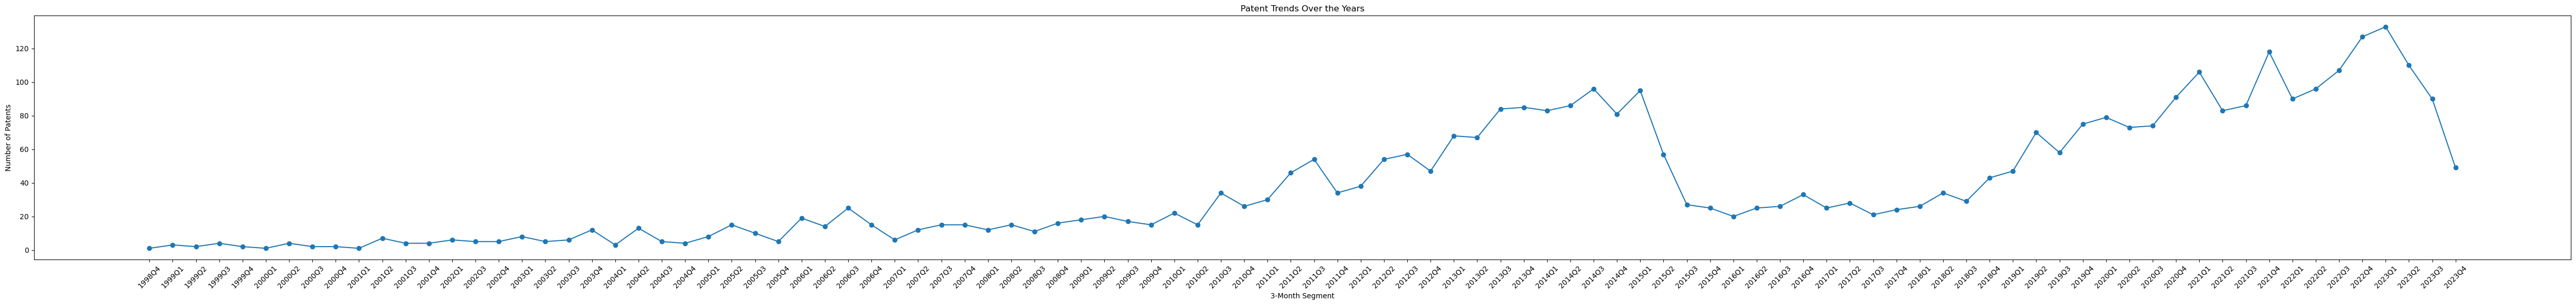

In [117]:
# Visualizing the increase and decrease of patents over the available years
plt.figure(figsize=(50, 6))
plt.plot(patents_count_by_segment['3-Month Segment'].astype(str), patents_count_by_segment['Number of Patents'], marker='o', linestyle='-')
plt.title('Patent Trends Over the Years')
plt.xlabel('3-Month Segment')
plt.ylabel('Number of Patents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [118]:
# Grouping patents by each unique assignee and counting the total number of patents
assignee_patent_counts = df['Assignee'].value_counts().reset_index()
assignee_patent_counts.columns = ['Assignee', 'Number of Patents']
assignee_patent_counts

,Assignee,Number of Patents
0,Others,1841
1,international business machines corporation,409
2,microsoft corporation,154
3,google inc.,111
4,"microsoft technology licensing, llc",83
...,...,...
1181,finiti research limited,1
1182,dignity health,1
1183,asignio inc.,1
1184,"clinc, inc.",1


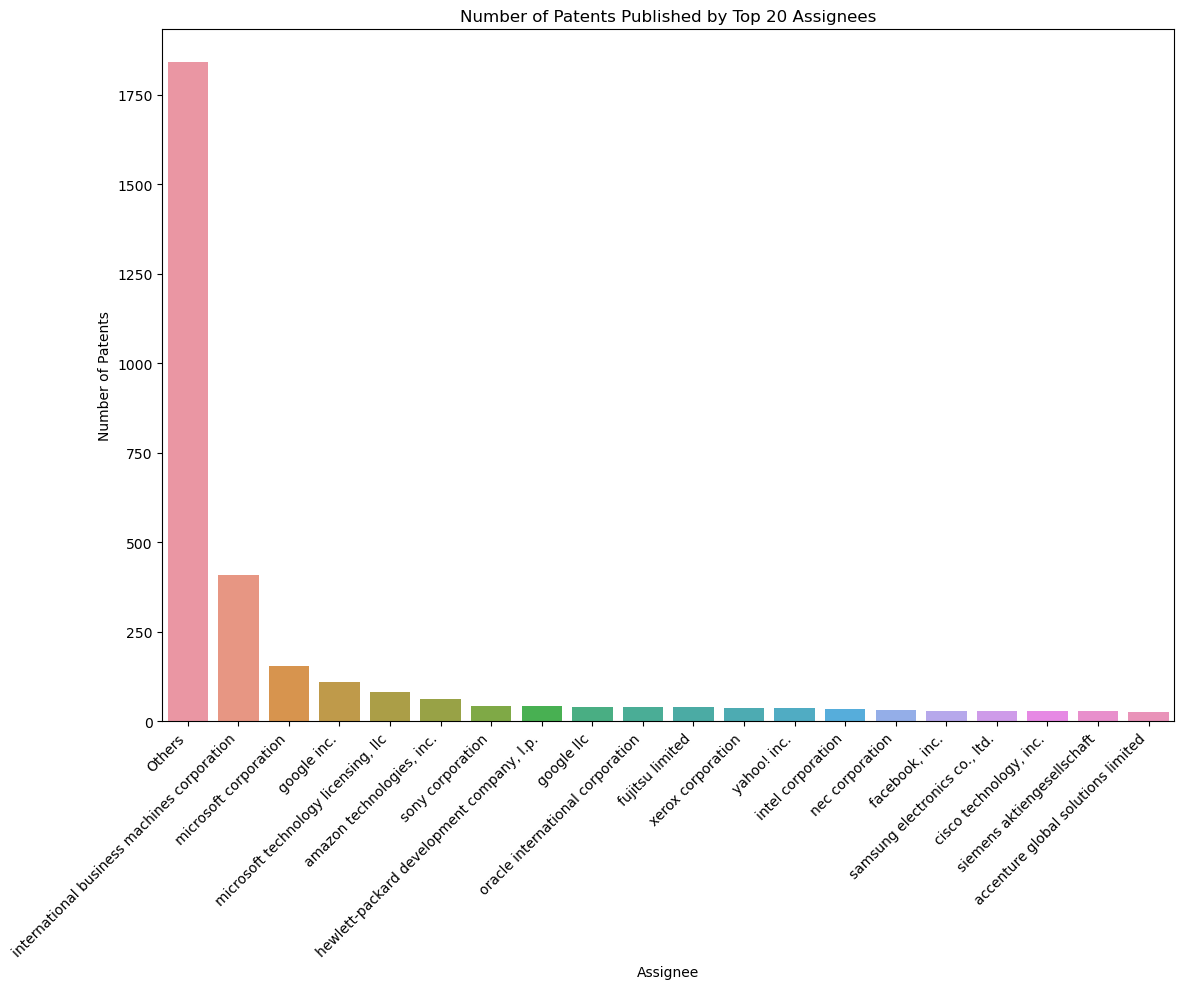

In [119]:
# Visualizing the number of patents for each assignee
plt.figure(figsize=(12, 10))
barplot = sns.barplot(x='Assignee', y='Number of Patents', data=assignee_patent_counts.head(20))  # Displaying the top 10 assignees
barplot.set(xlabel='Assignee', ylabel='Number of Patents')
barplot.set_title('Number of Patents Published by Top 20 Assignees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

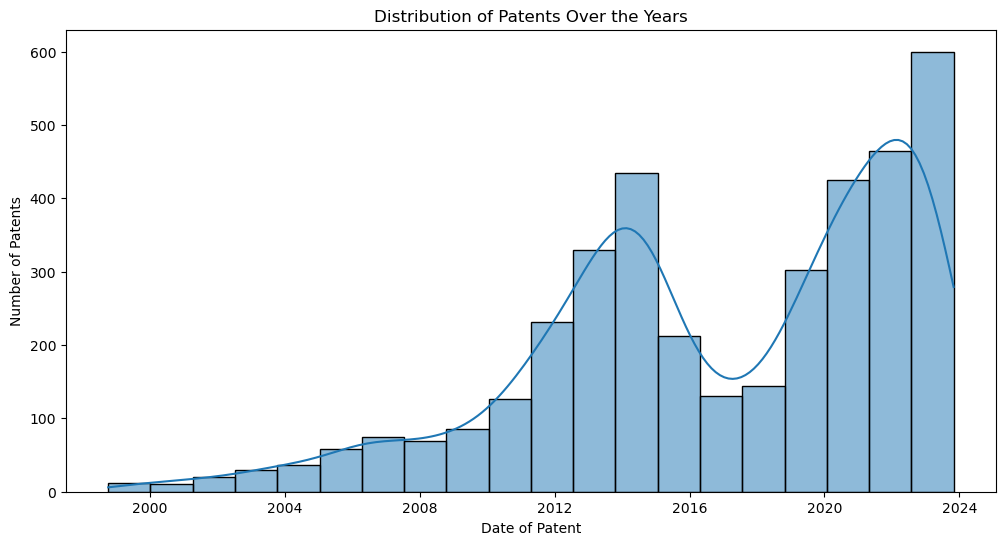

In [120]:
# Visualizing the distribution of patents over the years
plt.figure(figsize=(12, 6))
sns.histplot(df['Date of Patent'], bins=20, kde=True)
plt.title('Distribution of Patents Over the Years')
plt.xlabel('Date of Patent')
plt.ylabel('Number of Patents')
plt.show()

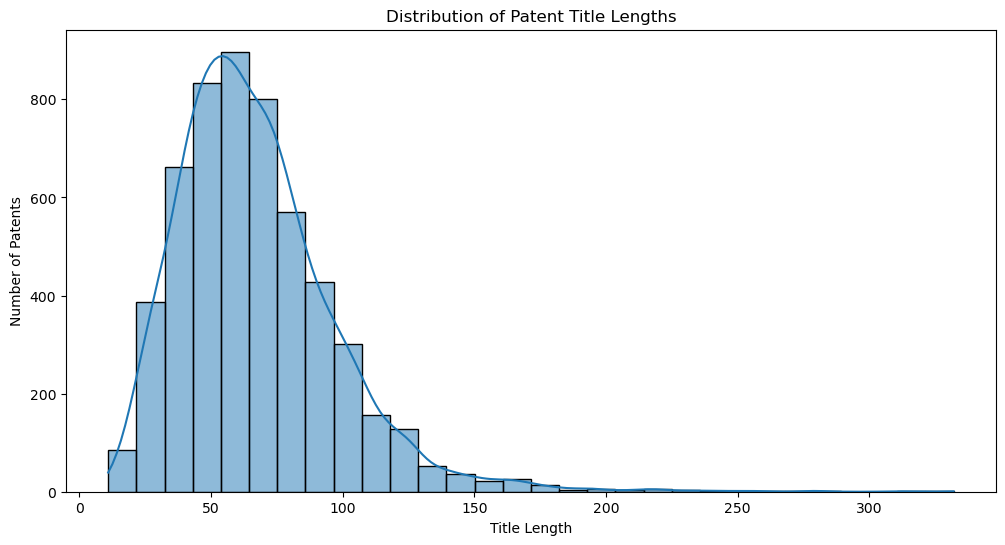

In [121]:
# Visualizing the distribution of patent titles' lengths
df['Title Length'] = df['Patent Title'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['Title Length'], bins=30, kde=True)
plt.title('Distribution of Patent Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Number of Patents')
plt.show()

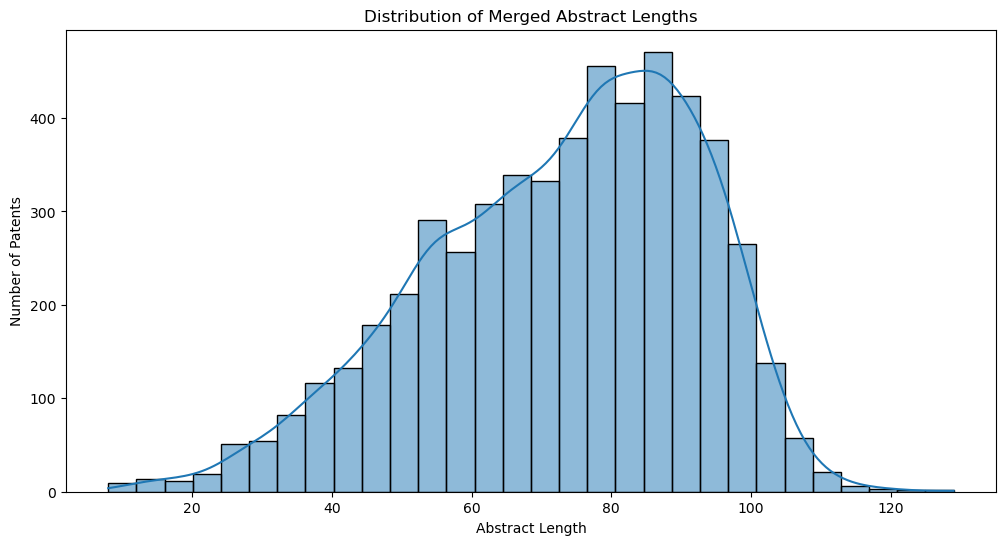

In [122]:
# Visualizing the distribution of merged abstracts lengths
df['Abstract Length'] = df['Merged Tokenized Abstract'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['Abstract Length'], bins=30, kde=True)
plt.title('Distribution of Merged Abstract Lengths')
plt.xlabel('Abstract Length')
plt.ylabel('Number of Patents')
plt.show()

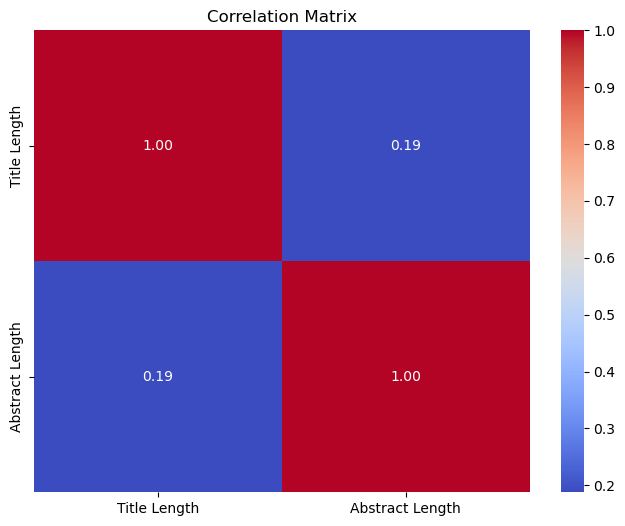

In [123]:
# Displaying the correlation matrix 
correlation_matrix = df[['Title Length', 'Abstract Length']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Applying Vectorization Techniques (i.e.,TF-IDF)

In [124]:
# Creating a new column 'Merged Tokenized Abstract Corpus' by joining the elements into a single string
df['Merged Tokenized Abstract Corpus'] = df['Merged Tokenized Abstract'].apply(' '.join)
df['Merged Tokenized Abstract Corpus'] = df['Merged Tokenized Abstract Corpus'].astype(str)

df

,Patent Title,Patent Number,Date of Patent,Abstract,Inventor,Assignee,Tokenized Patent Title,Tokenized Abstract,Merged Tokenized Abstract,3-Month Segment,Title Length,Abstract Length,Merged Tokenized Abstract Corpus
0,rehearsal network for generalized learning,11803755,2023-10-31,"a method, a device, and a non-transitory sto...",haripriya srinivasaraghavan,verizon patent and licensing inc.,"[rehearsal, network, generalize, learn]","[method, device, storage, medium, describe, re...","[rehearsal, network, generalize, learn, method...",2023Q4,42,78,rehearsal network generalize learn method devi...
1,individual plant recognition and localization,11803959,2023-10-31,implementations are described herein for tra...,"jie yang, zhiqiang yuan, hongxu ma, cheng-en g...",mineral earth sciences llc,"[individual, plant, recognition, localization]","[implementations, describe, herein, train, app...","[individual, plant, recognition, localization,...",2023Q4,45,77,individual plant recognition localization impl...
2,automated methods and systems for troubleshoot...,11803440,2023-10-31,automated processes and systems troubleshoot...,"ashot nshan harutyunyan, arnak poghosyan","vmware, inc.","[automate, methods, systems, troubleshoot, opt...","[automate, process, systems, troubleshoot, opt...","[automate, methods, systems, troubleshoot, opt...",2023Q4,134,89,automate methods systems troubleshoot optimize...
3,training ensemble models to improve performanc...,11803780,2023-10-31,a system and method for training base classi...,"yongjune kim, yuval cassuto","western digital technologies, inc.","[train, ensemble, model, improve, performance,...","[system, method, train, base, classifiers, boo...","[train, ensemble, model, improve, performance,...",2023Q4,94,33,train ensemble model improve performance prese...
4,machine learning for nutrient quantity estimat...,11803781,2023-10-31,systems and methods of the present disclosur...,"gary foster, ute gerwig, laura smith, reka dan...","weight watchers international, inc.","[machine, learn, nutrient, quantity, estimatio...","[systems, methods, present, disclosure, use, o...","[machine, learn, nutrient, quantity, estimatio...",2023Q4,97,99,machine learn nutrient quantity estimation die...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,method of determining statistically meaningful...,5897627,1999-04-27,a method including providing a database with...,"robert h. leivian, robert m. gardner","motorola, inc.","[method, determine, statistically, meaningful,...","[method, include, provide, database, plurality...","[method, determine, statistically, meaningful,...",1999Q2,52,75,method determine statistically meaningful rule...
5418,apparatus for refining determination rule corr...,5890143,1999-03-30,"in the apparatus, an evaluation object is ca...",shigeaki sakurai,kabushiki kaisha toshiba,"[apparatus, refine, determination, rule, corre...","[apparatus, evaluation, object, categorize, co...","[apparatus, refine, determination, rule, corre...",1999Q1,146,86,apparatus refine determination rule correspond...
5419,apparatus for monitoring system condition,5890142,1999-03-30,a monitoring apparatus for monitoring an ope...,"takayoshi tanimura, tadashi iokibe, yasunari f...",kabushiki kaisha meidensha,"[apparatus, monitor, system, condition]","[monitor, apparatus, monitor, operate, conditi...","[apparatus, monitor, system, condition, monito...",1999Q1,41,70,apparatus monitor system condition monitor app...
5420,object-oriented data mining and decision makin...,5875285,1999-02-23,the object-oriented data mining and decision...,hou-mei henry chang,Others,"[data, mine, decision, make, system]","[data, mine, decision, make, system, invent, d...","[data, mine, decision, make, system, data, min...",1999Q1,54,79,data mine decision make system data mine decis...


In [125]:
# List of generic words not related to machine learning

generic_words = '''a
abandon
ability
able
abortion
about
above
abroad
absence
absolute
absolutely
absorb
abuse
academic
accept
access
accident
accompany
accomplish
according
account
accurate
accuse
achieve
achievement
acid
acknowledge
acquire
across
act
action
active
activist
activity
actor
actress
actual
actually
ad
adapt
add
addition
additional
address
adequate
adjust
adjustment
administration
administrator
admire
admission
admit
adolescent
adopt
adult
advance
advanced
advantage
adventure
advertising
advice
advise
adviser
advocate
affair
affect
afford
afraid
African
African-American
after
afternoon
again
against
age
agency
agenda
agent
aggressive
ago
agree
agreement
agricultural
ah
ahead
aid
aide
AIDS
aim
air
aircraft
airline
airport
album
alcohol
alive
all
alliance
allow
ally
almost
alone
along
already
also
alter
alternative
although
always
AM
amazing
American
among
amount
analysis
analyst
analyze
ancient
and
anger
angle
angry
animal
anniversary
announce
annual
another
answer
anticipate
anxiety
any
anybody
anymore
anyone
anything
anyway
anywhere
apart
apartment
apparent
apparently
appeal
appear
appearance
apple
application
apply
appoint
appointment
appreciate
approach
appropriate
approval
approve
approximately
Arab
architect
area
argue
argument
arise
arm
armed
army
around
arrange
arrangement
arrest
arrival
arrive
art
article
artist
artistic
as
Asian
aside
ask
asleep
aspect
assault
assert
assess
assessment
asset
assign
assignment
assist
assistance
assistant
associate
association
assume
assumption
assure
at
athlete
athletic
atmosphere
attach
attack
attempt
attend
attention
attitude
attorney
attract
attractive
attribute
audience
author
authority
auto
available
average
avoid
award
aware
awareness
away
awful
baby
back
background
bad
badly
bag
bake
balance
ball
ban
band
bank
bar
barely
barrel
barrier
base
baseball
basic
basically
basis
basket
basketball
bathroom
battery
battle
be
beach
bean
bear
beat
beautiful
beauty
because
become
bed
bedroom
beer
before
begin
beginning
behavior
behind
being
belief
believe
bell
belong
below
belt
bench
bend
beneath
benefit
beside
besides
best
bet
better
between
beyond
Bible
big
bike
bill
billion
bind
biological
bird
birth
birthday
bit
bite
black
blade
blame
blanket
blind
block
blood
blow
blue
board
boat
body
bomb
bombing
bond
bone
book
boom
boot
border
born
borrow
boss
both
bother
bottle
bottom
boundary
bowl
box
boy
boyfriend
brain
branch
brand
bread
break
breakfast
breast
breath
breathe
brick
bridge
brief
briefly
bright
brilliant
bring
British
broad
broken
brother
brown
brush
buck
budget
build
building
bullet
bunch
burden
burn
bury
bus
business
busy
but
butter
button
buy
buyer
by
cabin
cabinet
cable
cake
calculate
call
camera
camp
campaign
campus
can
Canadian
cancer
candidate
cap
capability
capable
capacity
capital
captain
capture
car
carbon
card
care
career
careful
carefully
carrier
carry
case
cash
cast
cat
catch
category
Catholic
cause
ceiling
celebrate
celebration
celebrity
cell
center
central
century
CEO
ceremony
certain
certainly
chain
chair
chairman
challenge
chamber
champion
championship
chance
change
changing
channel
chapter
character
characteristic
characterize
charge
charity
chart
chase
cheap
check
cheek
cheese
chef
chemical
chest
chicken
chief
child
childhood
Chinese
chip
chocolate
choice
cholesterol
choose
Christian
Christmas
church
cigarette
circle
circumstance
cite
citizen
city
civil
civilian
claim
class
classic
classroom
clean
clear
clearly
client
climate
climb
clinic
clinical
clock
close
closely
closer
clothes
clothing
cloud
club
clue
cluster
coach
coal
coalition
coast
coat
code
coffee
cognitive
cold
collapse
colleague
collect
collection
collective
college
colonial
color
column
combination
combine
come
comedy
comfort
comfortable
command
commander
comment
commercial
commission
commit
commitment
committee
common
communicate
communication
community
company
compare
comparison
compete
competition
competitive
competitor
complain
complaint
complete
completely
complex
complicated
component
compose
composition
comprehensive
computer
concentrate
concentration
concept
concern
concerned
concert
conclude
conclusion
concrete
condition
conduct
conference
confidence
confident
confirm
conflict
confront
confusion
Congress
congressional
connect
connection
consciousness
consensus
consequence
conservative
consider
considerable
consideration
consist
consistent
constant
constantly
constitute
constitutional
construct
construction
consultant
consume
consumer
consumption
contact
contain
container
contemporary
content
contest
context
continue
continued
contract
contrast
contribute
contribution
control
controversial
controversy
convention
conventional
conversation
convert
conviction
convince
cook
cookie
cooking
cool
cooperation
cop
cope
copy
core
corn
corner
corporate
corporation
correct
correspondent
cost
cotton
couch
could
council
counselor
count
counter
country
county
couple
courage
course
court
cousin
cover
coverage
cow
crack
craft
crash
crazy
cream
create
creation
creative
creature
credit
crew
crime
criminal
crisis
criteria
critic
critical
criticism
criticize
crop
cross
crowd
crucial
cry
cultural
culture
cup
curious
current
currently
curriculum
custom
customer
cut
cycle
dad
daily
damage
dance
danger
dangerous
dare
dark
darkness
data
date
daughter
day
dead
deal
dealer
dear
death
debate
debt
decade
decide
decision
deck
declare
decline
decrease
deep
deeply
deer
defeat
defend
defendant
defense
defensive
deficit
define
definitely
definition
degree
delay
deliver
delivery
demand
democracy
Democrat
democratic
demonstrate
demonstration
deny
department
depend
dependent
depending
depict
depression
depth
deputy
derive
describe
description
desert
deserve
design
designer
desire
desk
desperate
despite
destroy
destruction
detail
detailed
detect
determine
develop
developing
development
device
devote
dialogue
die
diet
differ
difference
different
differently
difficult
difficulty
dig
digital
dimension
dining
dinner
direct
direction
directly
director
dirt
dirty
disability
disagree
disappear
disaster
discipline
discourse
discover
discovery
discrimination
discuss
discussion
disease
dish
dismiss
disorder
display
dispute
distance
distant
distinct
distinction
distinguish
distribute
distribution
district
diverse
diversity
divide
division
divorce
DNA
do
doctor
document
dog
domestic
dominant
dominate
door
double
doubt
down
downtown
dozen
draft
drag
drama
dramatic
dramatically
draw
drawing
dream
dress
drink
drive
driver
drop
drug
dry
due
during
dust
duty
each
eager
ear
early
earn
earnings
earth
ease
easily
east
eastern
easy
eat
economic
economics
economist
economy
edge
edition
editor
educate
education
educational
educator
effect
effective
effectively
efficiency
efficient
effort
egg
eight
either
elderly
elect
election
electric
electricity
electronic
element
elementary
eliminate
elite
else
elsewhere
e-mail
embrace
emerge
emergency
emission
emotion
emotional
emphasis
emphasize
employ
employee
employer
employment
empty
enable
encounter
encourage
end
enemy
energy
enforcement
engage
engine
engineer
engineering
English
enhance
enjoy
enormous
enough
ensure
enter
enterprise
entertainment
entire
entirely
entrance
entry
environment
environmental
episode
equal
equally
equipment
era
error
escape
especially
essay
essential
essentially
establish
establishment
estate
estimate
etc
ethics
ethnic
European
evaluate
evaluation
even
evening
event
eventually
ever
every
everybody
everyday
everyone
everything
everywhere
evidence
evolution
evolve
exact
exactly
examination
examine
example
exceed
excellent
except
exception
exchange
exciting
executive
exercise
exhibit
exhibition
exist
existence
existing
expand
expansion
expect
expectation
expense
expensive
experience
experiment
expert
explain
explanation
explode
explore
explosion
expose
exposure
express
expression
extend
extension
extensive
extent
external
extra
extraordinary
extreme
extremely
eye
fabric
face
facility
fact
factor
factory
faculty
fade
fail
failure
fair
fairly
faith
fall
false
familiar
family
famous
fan
fantasy
far
farm
farmer
fashion
fast
fat
fate
father
fault
favor
favorite
fear
feature
federal
fee
feed
feel
feeling
fellow
female
fence
few
fewer
fiber
fiction
field
fifteen
fifth
fifty
fight
fighter
fighting
figure
file
fill
film
final
finally
finance
financial
find
finding
fine
finger
finish
fire
firm
first
fish
fishing
fit
fitness
five
fix
flag
flame
flat
flavor
flee
flesh
flight
float
floor
flow
flower
fly
focus
folk
follow
following
food
foot
football
for
force
foreign
forest
forever
forget
form
formal
formation
former
formula
forth
fortune
forward
found
foundation
founder
four
fourth
frame
framework
free
freedom
freeze
French
frequency
frequent
frequently
fresh
friend
friendly
friendship
from
front
fruit
frustration
fuel
full
fully
fun
function
fund
fundamental
funding
funeral
funny
furniture
furthermore
future
gain
galaxy
gallery
game
gang
gap
garage
garden
garlic
gas
gate
gather
gay
gaze
gear
gender
gene
general
generally
generate
generation
genetic
gentleman
gently
German
gesture
get
ghost
giant
gift
gifted
girl
girlfriend
give
given
glad
glance
glass
global
glove
go
goal
God
gold
golden
golf
good
government
governor
grab
grade
gradually
graduate
grain
grand
grandfather
grandmother
grant
grass
grave
gray
great
greatest
green
grocery
ground
group
grow
growing
growth
guarantee
guard
guess
guest
guide
guideline
guilty
gun
guy
habit
habitat
hair
half
hall
hand
handful
handle
hang
happen
happy
hard
hardly
hat
hate
have
he
head
headline
headquarters
health
healthy
hear
hearing
heart
heat
heaven
heavily
heavy
heel
height
helicopter
hell
hello
help
helpful
her
here
heritage
hero
herself
hey
hi
hide
high
highlight
highly
highway
hill
him
himself
hip
hire
his
historian
historic
historical
history
hit
hold
hole
holiday
holy
home
homeless
honest
honey
honor
hope
horizon
horror
horse
hospital
host
hot
hotel
hour
house
household
housing
how
however
huge
human
humor
hundred
hungry
hunter
hunting
hurt
husband
hypothesis
I
ice
idea
ideal
identification
identify
identity
ie
if
ignore
ill
illegal
illness
illustrate
image
imagination
imagine
immediate
immediately
immigrant
immigration
impact
implement
implication
imply
importance
important
impose
impossible
impress
impression
impressive
improve
improvement
in
incentive
incident
include
including
income
incorporate
increase
increased
increasing
increasingly
incredible
indeed
independence
independent
index
Indian
indicate
indication
individual
industrial
industry
infant
infection
inflation
influence
inform
information
ingredient
initial
initially
initiative
injury
inner
innocent
inquiry
inside
insight
insist
inspire
install
instance
instead
institution
institutional
instruction
instructor
instrument
insurance
intellectual
intelligence
intend
intense
intensity
intention
interaction
interest
interested
interesting
internal
international
Internet
interpret
interpretation
intervention
interview
into
introduce
introduction
invasion
invest
investigate
investigation
investigator
investment
investor
invite
involve
involved
involvement
Iraqi
Irish
iron
Islamic
island
Israeli
issue
it
Italian
item
its
itself
jacket
jail
Japanese
jet
Jew
Jewish
job
join
joint
joke
journal
journalist
journey
joy
judge
judgment
juice
jump
junior
jury
just
justice
justify
keep
key
kick
kid
kill
killer
killing
kind
king
kiss
kitchen
knee
knife
knock
know
knowledge
lab
label
labor
laboratory
lack
lady
lake
land
landscape
language
lap
large
largely
last
late
later
Latin
latter
laugh
launch
law
lawn
lawsuit
lawyer
lay
layer
lead
leader
leadership
leading
leaf
league
lean
learn
learning
least
leather
leave
left
leg
legacy
legal
legend
legislation
legitimate
lemon
length
less
lesson
let
letter
level
liberal
library
license
lie
life
lifestyle
lifetime
lift
light
like
likely
limit
limitation
limited
line
link
lip
list
listen
literally
literary
literature
little
live
living
load
loan
local
locate
location
lock
long
long-term
look
loose
lose
loss
lost
lot
lots
loud
love
lovely
lover
low
lower
luck
lucky
lunch
lung
machine
mad
magazine
mail
main
mainly
maintain
maintenance
major
majority
make
maker
makeup
male
mall
man
manage
management
manager
manner
manufacturer
manufacturing
many
map
margin
mark
market
marketing
marriage
married
marry
mask
mass
massive
master
match
material
math
matter
may
maybe
mayor
me
meal
mean
meaning
meanwhile
measure
measurement
meat
mechanism
media
medical
medication
medicine
medium
meet
meeting
member
membership
memory
mental
mention
menu
mere
merely
mess
message
metal
meter
method
Mexican
middle
might
military
milk
million
mind
mine
minister
minor
minority
minute
miracle
mirror
miss
missile
mission
mistake
mix
mixture
mm-hmm
mode
model
moderate
modern
modest
mom
moment
money
monitor
month
mood
moon
moral
more
moreover
morning
mortgage
most
mostly
mother
motion
motivation
motor
mount
mountain
mouse
mouth
move
movement
movie
Mr
Mrs
Ms
much
multiple
murder
muscle
museum
music
musical
musician
Muslim
must
mutual
my
myself
mystery
myth
naked
name
narrative
narrow
nation
national
native
natural
naturally
nature
near
nearby
nearly
necessarily
necessary
neck
need
negative
negotiate
negotiation
neighbor
neighborhood
neither
nerve
nervous
net
network
never
nevertheless
new
newly
news
newspaper
next
nice
night
nine
no
nobody
nod
noise
nomination
none
nonetheless
nor
normal
normally
north
northern
nose
not
note
nothing
notice
notion
novel
now
nowhere
n't
nuclear
number
numerous
nurse
nut
object
objective
obligation
observation
observe
observer
obtain
obvious
obviously
occasion
occasionally
occupation
occupy
occur
ocean
odd
odds
of
off
offense
offensive
offer
office
officer
official
often
oh
oil
ok
okay
old
Olympic
on
once
one
ongoing
onion
online
only
onto
open
opening
operate
operating
operation
operator
opinion
opponent
opportunity
oppose
opposite
opposition
option
or
orange
order
ordinary
organic
organization
organize
orientation
origin
original
originally
other
others
otherwise
ought
our
ourselves
out
outcome
outside
oven
over
overall
overcome
overlook
owe
own
owner
pace
pack
package
page
pain
painful
paint
painter
painting
pair
pale
Palestinian
palm
pan
panel
pant
paper
parent
park
parking
part
participant
participate
participation
particular
particularly
partly
partner
partnership
party
pass
passage
passenger
passion
past
patch
path
patient
pattern
pause
pay
payment
PC
peace
peak
peer
penalty
people
pepper
per
perceive
percentage
perception
perfect
perfectly
perform
performance
perhaps
period
permanent
permission
permit
person
personal
personality
personally
personnel
perspective
persuade
pet
phase
phenomenon
philosophy
phone
photo
photograph
photographer
phrase
physical
physically
physician
piano
pick
picture
pie
piece
pile
pilot
pine
pink
pipe
pitch
place
plan
plane
planet
planning
plant
plastic
plate
platform
play
player
please
pleasure
plenty
plot
plus
PM
pocket
poem
poet
poetry
point
pole
police
policy
political
politically
politician
politics
poll
pollution
pool
poor
pop
popular
population
porch
port
portion
portrait
portray
pose
position
positive
possess
possibility
possible
possibly
post
pot
potato
potential
potentially
pound
pour
poverty
powder
power
powerful
practical
practice
pray
prayer
precisely
predict
prefer
preference
pregnancy
pregnant
preparation
prepare
prescription
presence
present
presentation
preserve
president
presidential
press
pressure
pretend
pretty
prevent
previous
previously
price
pride
priest
primarily
primary
prime
principal
principle
print
prior
priority
prison
prisoner
privacy
private
probably
problem
procedure
proceed
process
produce
producer
product
production
profession
professional
professor
profile
profit
program
progress
project
prominent
promise
promote
prompt
proof
proper
properly
property
proportion
proposal
propose
proposed
prosecutor
prospect
protect
protection
protein
protest
proud
prove
provide
provider
province
provision
psychological
psychologist
psychology
public
publication
publicly
publish
publisher
pull
punishment
purchase
pure
purpose
pursue
push
put
qualify
quality
quarter
quarterback
question
quick
quickly
quiet
quietly
quit
quite
quote
race
racial
radical
radio
rail
rain
raise
range
rank
rapid
rapidly
rare
rarely
rate
rather
rating
ratio
raw
reach
react
reaction
read
reader
reading
ready
real
reality
realize
really
reason
reasonable
recall
receive
recent
recently
recipe
recognition
recognize
recommend
recommendation
record
recording
recover
recovery
recruit
red
reduce
reduction
refer
reference
reflect
reflection
reform
refugee
refuse
regard
regarding
regardless
regime
region
regional
register
regular
regularly
regulate
regulation
reinforce
reject
relate
relation
relationship
relative
relatively
relax
release
relevant
relief
religion
religious
rely
remain
remaining
remarkable
remember
remind
remote
remove
repeat
repeatedly
replace
reply
report
reporter
represent
representation
representative
Republican
reputation
request
require
requirement
research
researcher
resemble
reservation
resident
resist
resistance
resolution
resolve
resort
resource
respect
respond
respondent
response
responsibility
responsible
rest
restaurant
restore
restriction
result
retain
retire
retirement
return
reveal
revenue
review
revolution
rhythm
rice
rich
rid
ride
rifle
right
ring
rise
risk
river
road
rock
role
roll
romantic
roof
room
root
rope
rose
rough
roughly
round
route
routine
row
rub
rule
run
running
rural
rush
Russian
sacred
sad
safe
safety
sake
salad
salary
sale
sales
salt
same
sample
sanction
sand
satellite
satisfaction
satisfy
sauce
save
saving
say
scale
scandal
scared
scenario
scene
schedule
scheme
scholar
scholarship
school
science
scientific
scientist
scope
score
scream
screen
script
sea
search
season
seat
second
secret
secretary
section
sector
secure
security
see
seed
seek
seem
segment
seize
select
selection
self
sell
Senate
senator
send
senior
sense
sensitive
sentence
separate
sequence
series
serious
seriously
serve
service
session
set
setting
settle
settlement
seven
several
severe
sex
sexual
shade
shadow
shake
shall
shape
share
sharp
she
sheet
shelf
shell
shelter
shift
shine
ship
shirt
shit
shock
shoe
shoot
shooting
shop
shopping
shore
short
shortly
shot
should
shoulder
shout
show
shower
shrug
shut
sick
side
sigh
sight
sign
signal
significance
significant
significantly
silence
silent
silver
similar
similarly
simple
simply
sin
since
sing
singer
single
sink
sir
sister
sit
site
situation
six
size
ski
skill
skin
sky
slave
sleep
slice
slide
slight
slightly
slip
slow
slowly
small
smart
smell
smile
smoke
smooth
snap
snow
so
so-called
soccer
social
society
soft
software
soil
solar
soldier
solid
solution
solve
some
somebody
somehow
someone
something
sometimes
somewhat
somewhere
son
song
soon
sophisticated
sorry
sort
soul
sound
soup
source
south
southern
Soviet
space
Spanish
speak
speaker
special
specialist
species
specific
specifically
speech
speed
spend
spending
spin
spirit
spiritual
split
spokesman
sport
spot
spread
spring
square
squeeze
stability
stable
staff
stage
stair
stake
stand
standard
standing
star
stare
start
state
statement
station
statistics
status
stay
steady
steal
steel
step
stick
still
stir
stock
stomach
stone
stop
storage
store
storm
story
straight
strange
stranger
strategic
strategy
stream
street
strength
strengthen
stress
stretch
strike
string
strip
stroke
strong
strongly
structure
struggle
student
studio
study
stuff
stupid
style
subject
submit
subsequent
substance
substantial
succeed
success
successful
successfully
such
sudden
suddenly
sue
suffer
sufficient
sugar
suggest
suggestion
suicide
suit
summer
summit
sun
super
supply
support
supporter
suppose
supposed
Supreme
sure
surely
surface
surgery
surprise
surprised
surprising
surprisingly
surround
survey
survival
survive
survivor
suspect
sustain
swear
sweep
sweet
swim
swing
switch
symbol
symptom
system
table
tablespoon
tactic
tail
take
tale
talent
talk
tall
tank
tap
tape
target
task
taste
tax
taxpayer
tea
teach
teacher
teaching
team
tear
teaspoon
technical
technique
technology
teen
teenager
telephone
telescope
television
tell
temperature
temporary
ten
tend
tendency
tennis
tension
tent
term
terms
terrible
territory
terror
terrorism
terrorist
test
testify
testimony
testing
text
than
thank
thanks
that
the
theater
their
them
theme
themselves
then
theory
therapy
there
therefore
these
they
thick
thin
thing
think
thinking
third
thirty
this
those
though
thought
thousand
threat
threaten
three
throat
through
throughout
throw
thus
ticket
tie
tight
time
tiny
tip
tire
tired
tissue
title
to
tobacco
today
toe
together
tomato
tomorrow
tone
tongue
tonight
too
tool
tooth
top
topic
toss
total
totally
touch
tough
tour
tourist
tournament
toward
towards
tower
town
toy
trace
track
trade
tradition
traditional
traffic
tragedy
trail
train
training
transfer
transform
transformation
transition
translate
transportation
travel
treat
treatment
treaty
tree
tremendous
trend
trial
tribe
trick
trip
troop
trouble
truck
true
truly
trust
truth
try
tube
tunnel
turn
TV
twelve
twenty
twice
twin
two
type
typical
typically
ugly
ultimate
ultimately
unable
uncle
under
undergo
understand
understanding
unfortunately
uniform
union
unique
unit
United
universal
universe
university
unknown
unless
unlike
unlikely
until
unusual
up
upon
upper
urban
urge
us
use
used
useful
user
usual
usually
utility
vacation
valley
valuable
value
variable
variation
variety
various
vary
vast
vegetable
vehicle
venture
version
versus
very
vessel
veteran
via
victim
victory
video
view
viewer
village
violate
violation
violence
violent
virtually
virtue
virus
visible
vision
visit
visitor
visual
vital
voice
volume
volunteer
vote
voter
vs
vulnerable
wage
wait
wake
walk
wall
wander
want
war
warm
warn
warning
wash
waste
watch
water
wave
way
we
weak
wealth
wealthy
weapon
wear
weather
wedding
week
weekend
weekly
weigh
weight
welcome
welfare
well
west
western
wet
what
whatever
wheel
when
whenever
where
whereas
whether
which
while
whisper
white
who
whole
whom
whose
why
wide
widely
widespread
wife
wild
will
willing
win
wind
window
wine
wing
winner
winter
wipe
wire
wisdom
wise
wish
with
withdraw
within
without
witness
woman
wonder
wonderful
wood
wooden
word
work
worker
working
works
workshop
world
worried
worry
worth
would
wound
wrap
write
writer
writing
wrong
yard
yeah
year
yell
yellow
yes
yesterday
yet
yield
you
young
your
yours
yourself
youth
zone
''' 

tokenized_generic_words = generic_words.split('\n')

# Removing white spaces and punctuation and converting to lower case
processed_tokens = [''.join(ch for ch in token if ch not in string.punctuation).strip().lower() for token in tokenized_generic_words if token.strip(string.punctuation)]
tokenized_generic_words = processed_tokens
#print(tokenized_generic_words)

 
# Creating a dictionary from the list
generic_dict = {word: '' for word in tokenized_generic_words}

# Function to remove generic words
def remove_generic_words(text):
    return ' '.join([word for word in text.split() if word not in generic_dict])

# Applying the function to the 'Merged Tokenized Abstract Corpus' column
df['Preprocessed Text'] = df['Merged Tokenized Abstract Corpus'].apply(remove_generic_words)

# Section 2

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string



# lemmatizer
lemmatizer = WordNetLemmatizer()

# Converting all text to lowercase
tokenized_generic_words = [word.lower() for word in tokenized_generic_words]

# Performing lemmatization
tokenized_generic_words = [lemmatizer.lemmatize(word) for word in tokenized_generic_words]

# Removing punctuation and empty tokens
table = str.maketrans('', '', string.punctuation)
tokenized_generic_words = [word.translate(table) for word in tokenized_generic_words]
tokenized_generic_words = [word for word in tokenized_generic_words if word]

# Eliminating special characters and numbers
tokenized_generic_words = [word for word in tokenized_generic_words if word.isalpha()]

#print(tokenized_generic_words)

# Creating a dictionary from the list
generic_dict = {word: '' for word in tokenized_generic_words}

# Function to remove generic words
def remove_generic_words(text):
    return ' '.join([word for word in text.split() if word not in generic_dict])

# Applying the function to the 'Merged Tokenized Abstract Corpus' column
df['Preprocessed Text_2'] = df['Preprocessed Text'].apply(remove_generic_words)
 


In [126]:
topic_modeling_stopwords = [
    "mobile", "correction", "devices", "input",  "server", "biopolymer", "coalesce", "hash", 
    "manufacture", "solutions", "webpage", "invert", "scenarios", "compact", "sensor", "escalation", 
    "controller", "locations", "programmable", "logic", "scan", "refine", "adverse", "undesirable", "botnet", 
    "authentication", "cells", "architecture", "fragment",  "etl", "processor", "usage", 
    "deduction", "lowest", "cache",  "thereon", "highest", "bin",  "vibration", 
    "preliminary", "summarization",  "strategies", "selective", "vibrations", "selectively", 
    "heterogeneous",  "metrology", "verify", "simulator", "optical", "diffraction", 
    "destinations",  "advertisement", "malware", "advertise", "datasets", "incremented", 
    "advertisements", "thresholds", "systems", "dialog", "synthetic", "interleave", "creatives", "decomposition", 
    "individualize", "simulate", "submissions", "interactions", "workstation", "diagnosis", "compound",  
    "connectivity", "blend", "portal", "frequencies", "hypothetical", "therefor", "asymmetric", "transformations", 
    "id", "prioritize", "ranker", "graphic",  "disclose", "grind", "topics", "dependency", 
    "resultant", "inclusion", "playback", "simulation", "header", "customers", "interconnect", "feedback", 
    "terminal", "apparatus", "reward", "users", "inputting", "preset", "accord", "correspond", "diagram", "units", 
    "allocate",  "closure", "pixel",  "circuit", "ensemble", "novelty", 
    "modification",  "operative", "vector", "ml", "indicators", "aggregate", "unify", "cascade", 
    "format", "graphical",  "devices", "remediation", "agents", "reliability", "components", "preferably", 
    "events", "prosthetic", "baseline", "tune",  "exemplars", "patients", "correspondence", 
     "unidentical", "substring", "queue", "identifier", "annotation", "contextual", "ingestion", 
    "axis", "gpu", "diagnostics", "columns", "identifiers", "occurrence", "subjective", "mismatch", "interactive", 
    "occurrences", "lat", "hvac", "solicit", "arc",  "metadata", "segmentation", "definitions", 
    "replacement", "relationships", "datum", "projection", "embodiments", "output", "metric", "filter", 
    "unstructured", "schema", "module", "metrics", "database", "learner", "goals", "analytic", "multimedia", 
    "intent", "textual", "abnormal", "query", "topical", "implementations", "elements", "users", "click", "rat", 
    "repository", "pipeline",  "interval", "relevance", "representations", "compute", "aspects", "disclosure", 
    "hierarchy", "parallel", "computationally", "forego", "outcomes", "discriminator", "module", "modules", 
    "input", "secondary", "update", "characteristics", "clause", "configure", "composite", "degradation", 
    "migration", "clothe", "interrupt", "attribution", "fog", "webpages", "discriminant", 
    "ontologies",  "affective",  "n", "static", "windows", "options", "engagement", 
    "calculation", "thereof", "electrical", "spectral", "symbols", "spectrum", "transparent", "iterations", "apparatus", "summary", "workflow", "encode", "bin", "operations", "ii", "iii", "iv", "obverse", "proxy", "vertex", 
    "vertices", "iteratively", "qa", "experts", "temperatures", "rout", "assets", "propensity", "detector", 
    "influential", "signature", "lifeotype", "prognostic", "slot", "facts", "normalize", "acoustic", 
    "applications", "normalization", "sub", "finite", "nfa", "dfa", "subspace", "simulate", "automata", 
    "regularize",   "server", "automation", "span", "readable", "bundle", "periodic", 
    "interface", "configure", "spam", "query", "items", "ontology", "similarity",  "database", 
    "statistical", "correctness", "comprise", "relevance", "temporal", "hierarchical", "spatial", "node", "htm", 
    "visualization", "hierarchically", "duplicate", "utilize", "probe", "implicit", "explicit", "errors",  
    "xml", "conceptual",  "xr", "setup", "concepts", "trigger", "configurable", "originate", 
    "tuples", "insert", "threshold", "termination", "invention", "inventive", "fraud", "integration", 
    "compatibility", "measurements", "cue", "detection", "motive", "parameters", "threshold", "ues", "entity", 
    "entities", "subscriber", "candidates", "logical", "causal", "availability", "collections", "histories", 
    "resources", "audit", "biometric",  "exploration", "skills",  
    "compression", "members", "categories", "instructions", "compress", "parse", "infer", "summaries", "techniques", 
    "web", "annotate", "calendar", "engines", "computers", "browse", "interactions", "automatically", 
    "variables", "dictionary", "correlation", "inputted", "workload", "modify", "explanatory", "subsystem", 
     "batch", "concurrently", "collector", "maximize", "correspond", "decompose",  "receiver", 
     "dispersion", "partition", "topology", "fabrication", "sensors", "sensor",  
    "surveillance", "equivalent", "proneness",  "unobserved", "api", "backup", "underwater", 
    "emergent", "voltages", "tenant", "directory", "apparatus", "recommendations", "personalize",  
    "fingerprint", "preferences",  "incomplete", "behavioral", "clip", "geometric", "behaviors", 
    "descriptor", "sac", "jointly", "shortcuts", "prototype", "translation", "relationships", 
    "disparate", "loop",   "ingest", "invoice", "sponsor", "convergence", "communications", 
     "cache", "likelihood", "transmit", "semiconductor", "processor", "continuously", "execution", 
    "adaptation", "protocol", "requirements", "responsive", "wherein", "pertain", "tag", "partial", "indicator", 
    "accumulate", "acquisition", "ascertain", "viewability", "proximity", "noisy", "w", "c", "malignancy", "k", "h", 
    "x",  "coordinate", "operable", "wireless", "geographical", "respectively", "maximum", "configure", 
    "ic", "fdb",  "retrieve", "retrieval", "receipt", "affinity", "situations", 
    "nearest", "entries", "fuse", "offline",  "discriminate", "automaton", "configure", 
    "integrate", "reliance", "intrusion", "graph",  "sequential", "observations",  
     "electronically", "fusion", "diagnostic", "cod", "telemetry", "modes", "automatic", "audio", "suggestions", "failures", "urls", "associative", "standardize", "occupancy", "members", "rat", 
    "dashboard", "signature",  "linguistic", "strangers", "sensitivity", "epoch", "stamp", "ivr", 
    "subscribe", "hardware", "computerize", "mediate", "discriminative",  "coordinator", "pump", 
    "enforce",   "partition",   "abnormality", 
    "resolutions", "candidates", "executable", "accelerator", "drill", "technologies",  "iterative", 
    "specifications",  "sensor",  "settings", "hmi", "packet", 
    "indices", "navigation", "packets", "wearable", "processor",  "posture", "subscription", "exemplary", 
    "obfuscate", "events",  "database", "obfuscation",  "alert", "mathematical", "behaviour",  
    "curve", "neuromuscular", "output",   "histogram", "numerical", "customize", "incidence", 
    "therein",  "versions", "geolocation", "feasible", "geographic", 
       "browser", "providers", "locations", "trajectory", "trajectories", 
    "visa",  "intermediate",  "processors",  "deploy", "output", "greater", "input", 
       "input",   "polymer", 
   "properties", "voltage",  "sketch", "videos",   
    "notification",   "allocation", "ip", "optimization", "combinations", 
    "popularity", "sensory", "inference", "domain", "domains", "examples", "hybrid", "compensation",
      "portable",  "activities", "bid", 
    "plural",  "website", "advertiser",   "destination", 
     "advisory", "apparatus", "configure",  "products", "atoms", 
    "relational", "runtime", "differences",   "systems", "thread", 
    "obtainment", "footprint", "lineage", "repair", "wireless", "offspring", "enactive", "dependencies", 
    "virtual", "restrict", "edit", "interfaces", "drift",  "differential",  
     "initiate", "connections", "array", "deviation", "unclassified", "criticality", "microblog", 
    "friends", "cumulative",  "artifacts", "database", "correlate", "impressions", 
    "capabilities", "interface", "persons", "cursor",  "responses", "items", "preferences", 
    "posterior", "descriptive", "tile", "shader",  "spike", "integrity", "transceiver", 
    "consistency",  "smallest", "solutions", "reverse", "output",  
     "annotations", "extract", "discriminant", "query", "descriptors", "recognizer",  "recipient", 
    "format", "individuals", "module", "enrich", 
    "microbumps", "professionals", "harvest", "physiological", "vehicles", "invitation", "individuals", 
     "federate",  "tuple", "url", "output", "emg", "processor", 
     "downstream",  "chunk",  "compute", "respective", "choices", 
    "circuitry", "stag", "endpoint",  "compromise", "dumbbell", "selections",  "integration", 
    "devices", "chromosomes", "requestor", "templates", "template", "policies", "incoming", "expressions", "interface", 
    "repository", "geometry", "render", "auxiliary", "quantity",
     "simulation", "configuration", "configure",  "deployment", "configurations", 
    "manipulation", "functionality", "interface", "degrees", 
    "interface", "server", "compute"
]


topic_modeling_dict = {word: '' for word in topic_modeling_stopwords}

# Function to remove initial unwanted topic modeling words
def remove_topic_modeling_words(text):
    return ' '.join([word for word in text.split() if word not in topic_modeling_dict])

# Applying the function to the 'Preprocessed Text_2' column
df['Preprocessed Text_3'] = df['Preprocessed Text_2'].apply(remove_topic_modeling_words)



In [127]:
# Creating the abstract_tokens list and word_set list
abstract_tokens = []
word_set = []
 
for abstract_corpus in df['Preprocessed Text_3']:
    tokens = [word.lower() for  word in word_tokenize(abstract_corpus) if word.isalpha()]
    abstract_tokens.append(tokens)
    for word in tokens:
        if word not in word_set:
            word_set.append(word)
 
word_set = set(word_set)
total_abstracts = len(abstract_tokens)
 
# Creating a dictionary to store index of each word
index_dictionary = {} 
i = 0
for word in word_set:
    index_dictionary[word] = i
    i += 1
    
# Creating a dictionary that stores the count of each word
 
def word_count(abstract_tokens):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for token in abstract_tokens:
            if word in token:
                word_count[word] += 1
    return word_count
 
word_count = word_count(abstract_tokens)

In [128]:
# Defining a function that calculates the Term Frequency
def term_frequency(abstract_tokens, word):
    total_abstract_count = len(abstract_tokens)
    occurance = len([token for token in abstract_tokens if token == word])
    return occurance/total_abstract_count

# Defining a function that calculates the Inverse Document Frequency
 
def inverse_document_frequency(token):
    try:
        token_occurance = word_count[token] + 1
    except:
        token_occurance = 1
    return np.log(total_abstracts/token_occurance)

# Defining a function that generates the TF-IDF vector of a single abstract of a patent

def tf_idf(tokens):
    tf_idf_vector = np.zeros((len(word_set),))
    for token in tokens:
        tf = term_frequency(tokens,token)
        idf = inverse_document_frequency(token)
         
        value = tf*idf
        tf_idf_vector[index_dictionary[token]] = value 
    return tf_idf_vector

In [129]:
# Generating the TF-IDF vectors of all the patent abstracts
vectors = []
for tokens in abstract_tokens:
    vector = tf_idf(tokens)
    vectors.append(vector)
 
print(vectors)
df['TF-IDF Vectors'] = vectors

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 

In [130]:
# Displaying the final dataframe after data preprocessing and applying TF-IDF vectorization technique
df

,Patent Title,Patent Number,Date of Patent,Abstract,Inventor,Assignee,Tokenized Patent Title,Tokenized Abstract,Merged Tokenized Abstract,3-Month Segment,Title Length,Abstract Length,Merged Tokenized Abstract Corpus,Preprocessed Text,Preprocessed Text_2,Preprocessed Text_3,TF-IDF Vectors
0,rehearsal network for generalized learning,11803755,2023-10-31,"a method, a device, and a non-transitory sto...",haripriya srinivasaraghavan,verizon patent and licensing inc.,"[rehearsal, network, generalize, learn]","[method, device, storage, medium, describe, re...","[rehearsal, network, generalize, learn, method...",2023Q4,42,78,rehearsal network generalize learn method devi...,rehearsal generalize rehearsal generalize inpu...,rehearsal generalize rehearsal generalize inpu...,rehearsal generalize rehearsal generalize rehe...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,individual plant recognition and localization,11803959,2023-10-31,implementations are described herein for tra...,"jie yang, zhiqiang yuan, hongxu ma, cheng-en g...",mineral earth sciences llc,"[individual, plant, recognition, localization]","[implementations, describe, herein, train, app...","[individual, plant, recognition, localization,...",2023Q4,45,77,individual plant recognition localization impl...,localization implementations herein indicative...,localization implementations herein indicative...,localization herein indicative plurality indic...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,automated methods and systems for troubleshoot...,11803440,2023-10-31,automated processes and systems troubleshoot...,"ashot nshan harutyunyan, arnak poghosyan","vmware, inc.","[automate, methods, systems, troubleshoot, opt...","[automate, process, systems, troubleshoot, opt...","[automate, methods, systems, troubleshoot, opt...",2023Q4,134,89,automate methods systems troubleshoot optimize...,automate methods systems troubleshoot optimize...,automate methods systems troubleshoot optimize...,automate methods troubleshoot optimize automat...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,training ensemble models to improve performanc...,11803780,2023-10-31,a system and method for training base classi...,"yongjune kim, yuval cassuto","western digital technologies, inc.","[train, ensemble, model, improve, performance,...","[system, method, train, base, classifiers, boo...","[train, ensemble, model, improve, performance,...",2023Q4,94,33,train ensemble model improve performance prese...,ensemble unreliable classifiers classifiers bo...,ensemble unreliable classifiers classifiers bo...,unreliable classifiers classifiers boost algor...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,machine learning for nutrient quantity estimat...,11803781,2023-10-31,systems and methods of the present disclosur...,"gary foster, ute gerwig, laura smith, reka dan...","weight watchers international, inc.","[machine, learn, nutrient, quantity, estimatio...","[systems, methods, present, disclosure, use, o...","[machine, learn, nutrient, quantity, estimatio...",2023Q4,97,99,machine learn nutrient quantity estimation die...,nutrient quantity estimation methods thereof s...,nutrient quantity estimation methods thereof s...,nutrient estimation methods methods consumable...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,method of determining statistically meaningful...,5897627,1999-04-27,a method including providing a database with...,"robert h. leivian, robert m. gardner","motorola, inc.","[method, determine, statistically, meaningful,...","[method, include, provide, database, plurality...","[method, determine, statistically, meaningful,...",1999Q2,52,75,method determine statistically meaningful rule...,statistically meaningful database plurality it...,statistically meaningful database plurality it...,statistically meaningful plurality som plurali...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


#  Topic Modeling

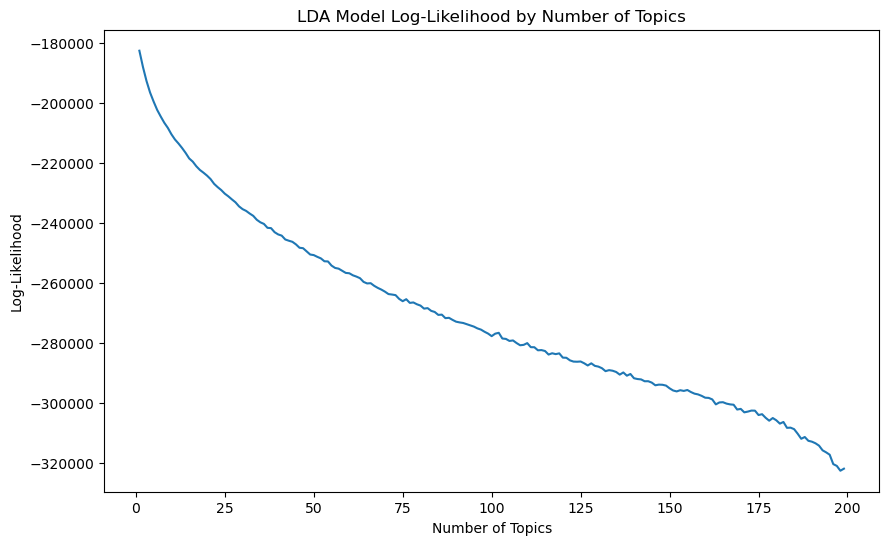

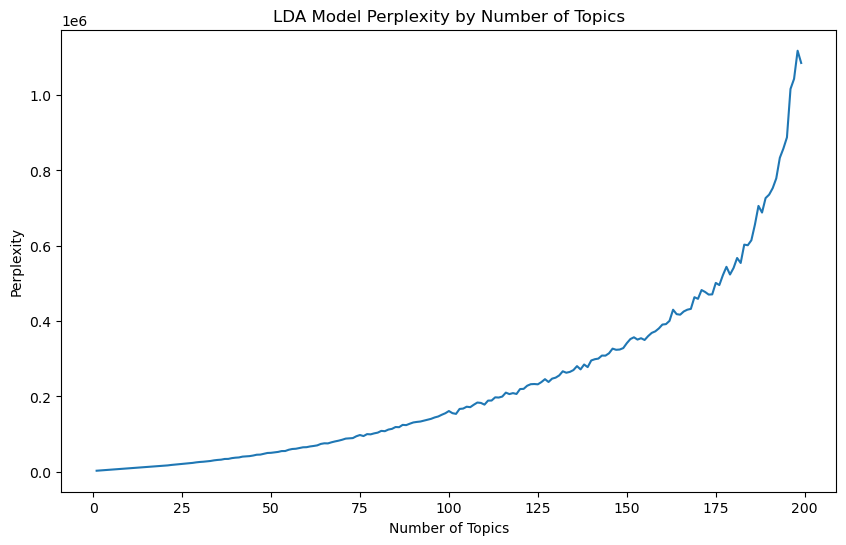

In [57]:
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Converting TF-IDF Vectors from list of arrays to 2D numpy array
tfidf_matrix = np.stack(df['TF-IDF Vectors'].values)

# Filtering out rows with all-zero TF-IDF vectors
non_zero_indices = np.any(tfidf_matrix != 0, axis=1)
tfidf_matrix = tfidf_matrix[non_zero_indices]

# Defining the range of the number of topics
n_topics = list(range(1, 200, 1))  # Change this range according to your needs

# Lists to store the results
log_likelihoods = []
perplexities = []

# Applying LDA for each number of topics
for n in n_topics:
    lda = LatentDirichletAllocation(n_components=n, random_state=0)
    lda.fit(tfidf_matrix)
    
    # Computing log-likelihood and perplexity
    log_likelihoods.append(lda.score(tfidf_matrix))
    perplexities.append(lda.perplexity(tfidf_matrix))

# Plotting log-likelihoods
plt.figure(figsize=(10, 6))
plt.plot(n_topics, log_likelihoods)
plt.title('LDA Model Log-Likelihood by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Log-Likelihood')
plt.show()

# Plotting perplexities
plt.figure(figsize=(10, 6))
plt.plot(n_topics, perplexities)
plt.title('LDA Model Perplexity by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.show()


Topic #0:
constraint broadcast constraints residential observable comply warehouse cep anonymous amongst

Topic #1:
databases nlp registry commonly containers unexpected engagements conversational pooler correlator

Topic #2:
govern prospective laser dom adapters appointments dependence governance subsets inverse

Topic #3:
analytical dns morphological insights dictionaries fraudulent synopsis plurality mutually subnetwork

Topic #4:
predictive variance methods plurality limitations categorical homogenous presently disambiguate variances

Topic #5:
overlap stronger quantize modifications fetch oracle contextually happiness milp embodiment

Topic #6:
optimal recursive thereto evolutionary rf kernels subsurface dense probable guardband

Topic #7:
predefined interior thickness footprints clickthrough dhcp marital voucher foods predetermine

Topic #8:
vectors validate validation thee unhealthy suspend execute dissimilarity notifications fucntion

Topic #9:
predictor boolean effectiveness i

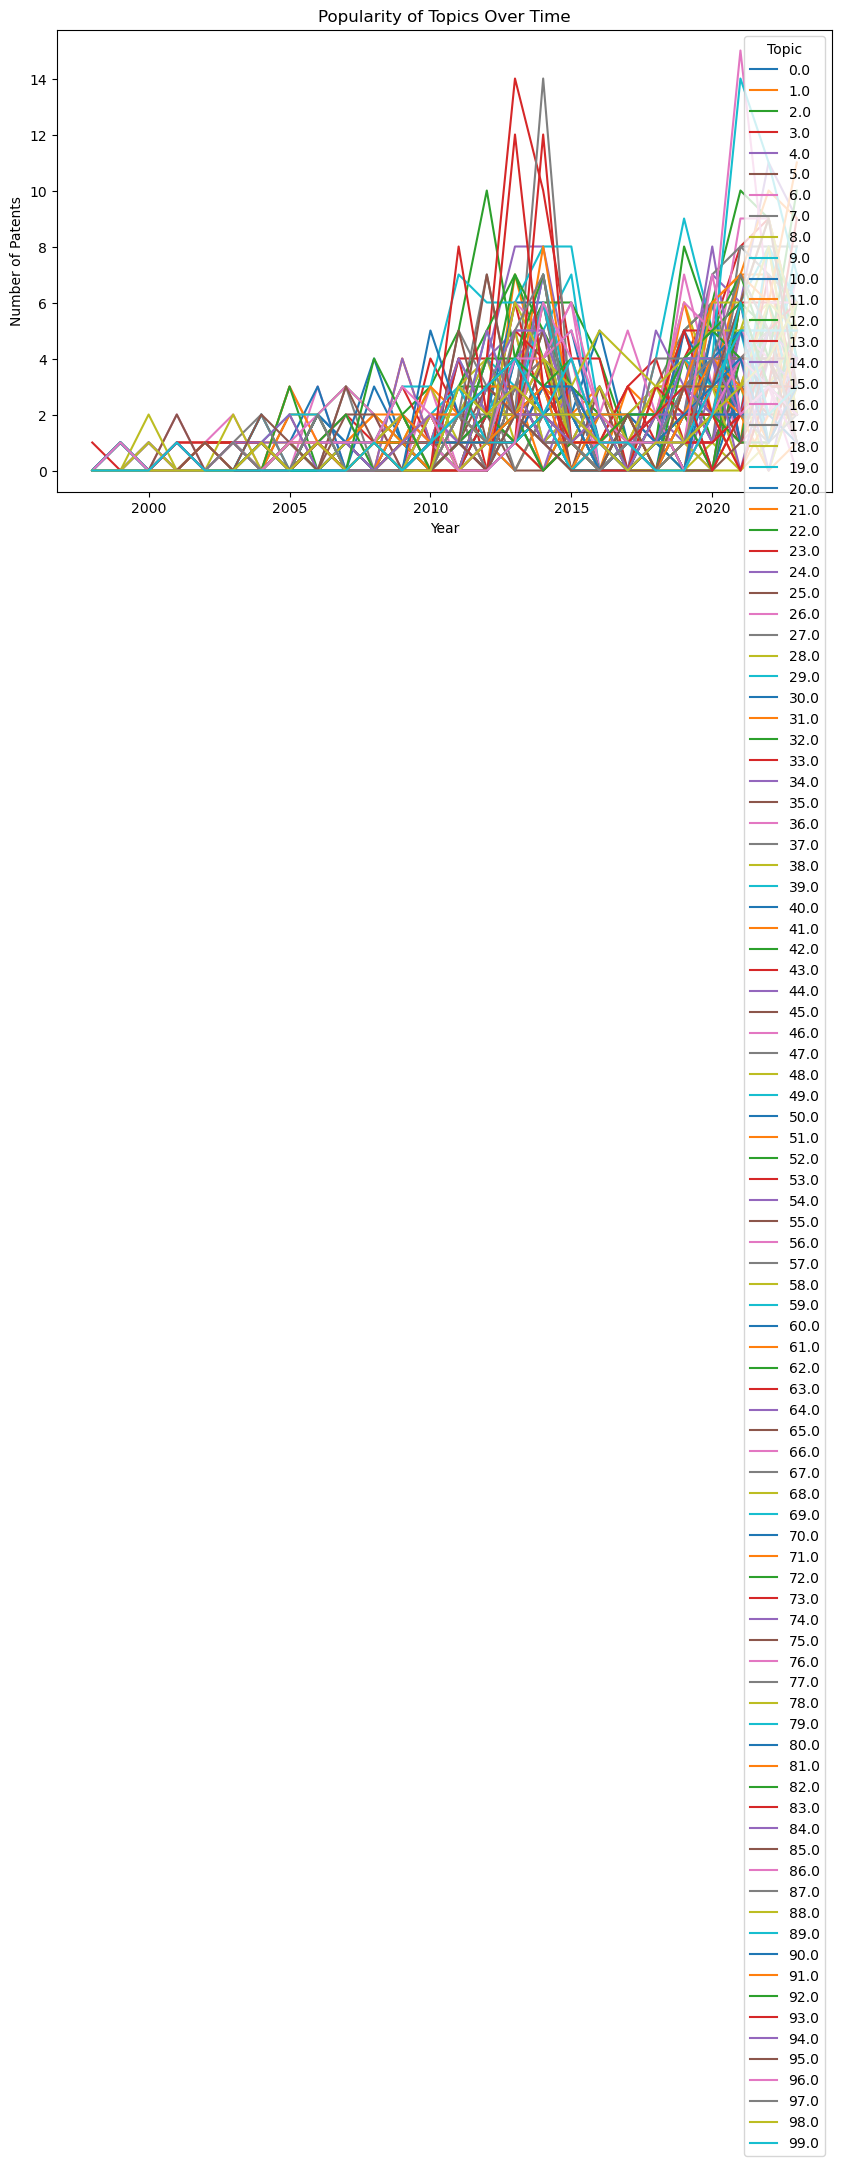

In [83]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import matplotlib.pyplot as plt

# Converting TF-IDF Vectors from list of arrays to 2D numpy array
tfidf_matrix = np.stack(df['TF-IDF Vectors'].values)

# Filtering out rows with all-zero TF-IDF vectors
non_zero_indices = np.any(tfidf_matrix != 0, axis=1)
tfidf_matrix = tfidf_matrix[non_zero_indices]

# Defining Search Param
search_params = {'n_components': [100, 150, 200], 'learning_decay': [.5, .7, .9]}

# Initiating the Model
lda = LatentDirichletAllocation()

# Initiating Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(tfidf_matrix)

# Best Model
best_lda_model = model.best_estimator_

# Assigning topics to patents
topic_values = best_lda_model.transform(tfidf_matrix)
df.loc[non_zero_indices, 'Topic'] = topic_values.argmax(axis=1)

# Getting the feature names from index_dictionary
feature_names = {v: k for k, v in index_dictionary.items()}

# Printing top keywords for each topic
for topic_idx, topic in enumerate(best_lda_model.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# Converting 'Date of Patent' to datetime and extracting year
df['Date of Patent'] = pd.to_datetime(df['Date of Patent'])
df['Year'] = df['Date of Patent'].dt.year

# Tracking the popularity of each topic over time
topic_popularity = df.groupby(['Year', 'Topic']).size().unstack(fill_value=0)

# Plotting the popularity of topics over time
topic_popularity.plot(kind='line', figsize=(10, 6))
plt.title('Popularity of Topics Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.show()


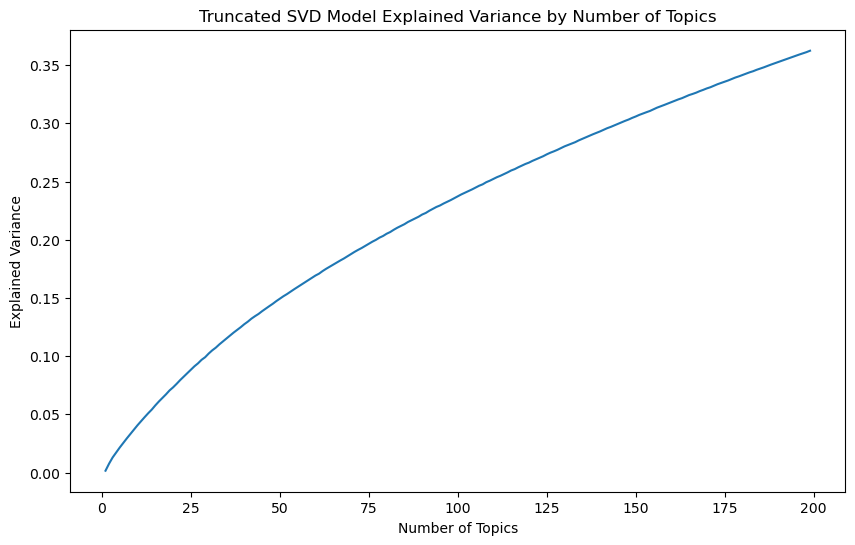

In [44]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Converting TF-IDF Vectors from list of arrays to 2D numpy array
tfidf_matrix = np.stack(df['TF-IDF Vectors'].values)

# Filtering out rows with all-zero TF-IDF vectors
non_zero_indices = np.any(tfidf_matrix != 0, axis=1)
tfidf_matrix = tfidf_matrix[non_zero_indices]

# Defining the range of the number of topics
n_topics = list(range(1, 200, 1))  # Change this range according to your needs

# List to store the results
explained_variances = []

# Running Truncated SVD for each number of topics
for n in n_topics:
    svd = TruncatedSVD(n_components=n, random_state=0)
    svd.fit(tfidf_matrix)
    
    # Computing explained variance ratio
    explained_variances.append(svd.explained_variance_ratio_.sum())

# Plotting explained variances
plt.figure(figsize=(10, 6))
plt.plot(n_topics, explained_variances)
plt.title('Truncated SVD Model Explained Variance by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Explained Variance')
plt.show()


Topic #0:
plurality prediction classification predictive methods classifier classify probability embodiment parameter

Topic #1:
prediction predictive probability predictions forecast certainty regression analytics predictor log

Topic #2:
predictive plurality subset methods dataset certainty analytics intelligent sequel onset

Topic #3:
classification predictive classify classifier semantic methods classifiers determination subset automate

Topic #4:
semantic semantically corpus prediction accordance probability methods rankers searchable utterance

Topic #5:
determination semantic estimation robot predetermine anomaly malicious specification impersonation herein

Topic #6:
parameter neural robot probability embodiment methods log subset optimize execute

Topic #7:
robot plurality robotic predetermine prediction classification grasp robots specify trainee

Topic #8:
neural artificial methods adaptive recurrent subset dataset neuron decoder rnn

Topic #9:
probability probabilistic embo

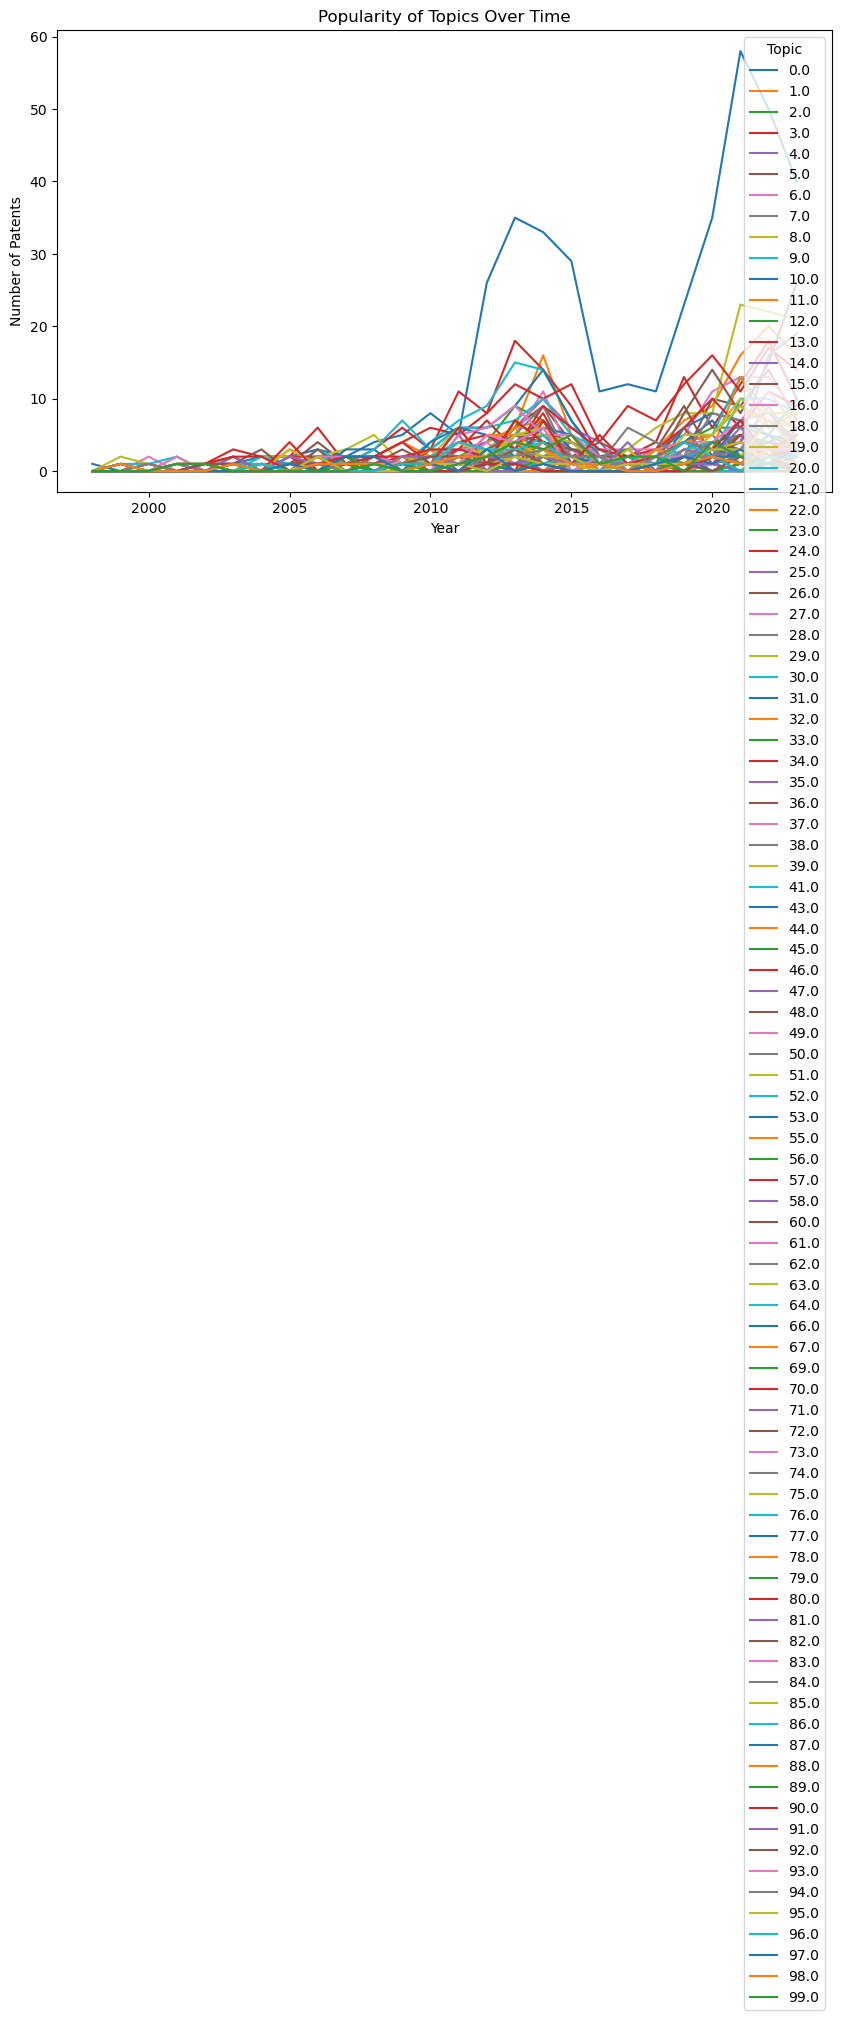

In [131]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Converting TF-IDF Vectors from list of arrays to 2D numpy array
tfidf_matrix = np.stack(df['TF-IDF Vectors'].values)

# Filtering out rows with all-zero TF-IDF vectors
non_zero_indices = np.any(tfidf_matrix != 0, axis=1)
tfidf_matrix = tfidf_matrix[non_zero_indices]

# Topic Modeling using LSA
lsa = TruncatedSVD(n_components=100, random_state=0)
lsa.fit(tfidf_matrix)

# Assigning topics to patents
topic_values = lsa.transform(tfidf_matrix)
df.loc[non_zero_indices, 'Topic'] = topic_values.argmax(axis=1)

# Getting the feature names from index_dictionary
feature_names = {v: k for k, v in index_dictionary.items()}

# Printing top keywords for each topic
for topic_idx, topic in enumerate(lsa.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# Converting 'Date of Patent' to datetime and extracting year
df['Date of Patent'] = pd.to_datetime(df['Date of Patent'])
df['Year'] = df['Date of Patent'].dt.year

# Tracking the popularity of each topic over time
topic_popularity = df.groupby(['Year', 'Topic']).size().unstack(fill_value=0)

# Plotting the popularity of topics over time
topic_popularity.plot(kind='line', figsize=(10, 6))
plt.title('Popularity of Topics Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.show()


In [132]:
# Defining the topics
topics = {
    0: "plurality prediction classification predictive methods classifier classify probability embodiment parameter",
    1: "prediction predictive probability predictions forecast certainty regression analytics predictor log",
    2: "predictive plurality subset methods dataset certainty analytics intelligent sequel onset",
    3: "classification predictive classify classifier semantic methods classifiers determination subset automate",
    4: "semantic semantically corpus prediction accordance probability methods rankers searchable utterance",
    5: "determination semantic estimation robot predetermine anomaly malicious specification impersonation herein",
    6: "parameter neural robot probability embodiment methods log subset optimize execute",
    7: "robot plurality robotic predetermine prediction classification grasp robots specify trainee",
    8: "neural artificial methods adaptive recurrent subset dataset neuron decoder rnn",
    9: "probability probabilistic embodiment classifier probabilities corpus log conditional token estimation",
    10: "classifier subset log dataset classifiers anomaly methods vectors execute additionally",
    11: "subset dataset algorithm classification execute methods token facilitate predictor subsets",
    12: "log embodiment methods subset anomaly classification execute analytics algorithm dataset",
    13: "embodiment methods optimize analytics corpus facilitate transaction dataset accordance execute",
    14: "embodiment subset token predictive neural classifier behalf analytics semantic plurality",
    15: "anomaly dataset anomalous anomalies embodiment probability analytics semantic unsupervised strengths",
    16: "corpus anomaly subset anomalous extraction mechanisms facilitate keywords anomalies keyword",
    17: "anomaly transaction methods token specify anomalous execute intelligent herein anomalies",
    18: "token tokens corpus predictor dataset specify stimuli periods overlap instantiations",
    19: "transaction transactions embodiment corpus dataset token classification synopsis subset merchant",
    20: "algorithm execute transaction intelligent estimation extraction vectors corpus artificial accordance",
    21: "classify keywords keyword specify predetermine accordance execute vectors malicious extraction",
    22: "analytics accordance facilitate intelligent artificial ai execute classify herein estimation",
    23: "facilitate keywords keyword intelligent extraction artificial classification ai algorithm specify",
    24: "optimize analytics accordance predetermine keywords extraction keyword specify estimation forecast",
    25: "analytics algorithm methods extraction adaptive keywords keyword subset classification apparatuses",
    26: "specify extraction analytics forecast automate predictor orbital superordinate assertion precision",
    27: "estimation execute keywords classification methods keyword specify estimator extraction embodiment",
    28: "accordance predetermine facilitate algorithm herein methods vectors classification matrix indicative",
    29: "solicitation optimize classify notify ai builder forecast predictor categorize populate",
    30: "offend solicitation execute analytics estimation classify optimize commonly intelligent estimator",
    31: "facilitate probabilistic estimation extraction classify analytics malicious inventory merge optimize",
    32: "probabilistic intelligent malicious inventory accordance predetermine specify classification bayesian methods",
    33: "execute optimize facilitate extraction probability additionally classification merge neural specify",
    34: "execute forecast probabilistic accordance malicious keywords automate facilitate classification inventory",
    35: "artificial ai predetermine optimize extraction execute matrix facilitate augment embodiment",
    36: "extraction thermal accordance forecast intelligent merge classify methods attain anomalous",
    37: "thermal specify facilitate attain analytics keywords anomalous optimize algorithm classification",
    38: "adaptive execute artificial extraction ai automate interact autonomous adaptively prospective",
    39: "memories predetermine execute transitional forecast extraction analytics intelligent malicious matrix",
    40: "memories accordance estimation optimize classify specify transitional artificial automate autonomous",
    41: "associations automate operational predetermine malicious extraction architectures thereupon indications bionic",
    42: "communicatively probabilistic predetermine inventory differentially algorithm unsupervised classify supervise backups",
    43: "communicatively malicious vectors matrix differentially supervise unsupervised adaptive herein associations",
    44: "vectors matrix probabilistic execute contexts associations inventory svm indicative dynamic",
    45: "statistically vectors intervals therefrom therapists bias estimator boolean areas execute",
    46: "automate matrix recursive verification contexts continuous appliance prioritization heuristic analytics",
    47: "inventory automate interact protocols opportunities malicious substantially distributions interrelation specification",
    48: "interact dynamic dynamically automate behalf specification populate probabilistic predefined contexts",
    49: "matrix supervise interact unsupervised matrices kernel grid accordance fuzzy factorization",
    50: "herein matrix indicative dynamic autonomous keywords contexts inventory sentiment supervise",
    51: "contexts dynamic dynamically supervise fuzzy unsupervised prioritization luminance matrix operational",
    52: "indicative dynamic keyword estimator facilitate conversion extraction matrix dynamically additionally",
    53: "merge indicative autonomous contexts matrix keywords assignments estimation hyperparameter superset",
    54: "estimator keywords merge dynamic dynamically indicative ai bias notify populate",
    55: "estimator contexts indicative anomalous matrix interact sentiment default merge predictor",
    56: "estimator keyword merge autonomous dynamic conversion dynamically notify matrix guidance",
    57: "fuzzy impute predictor imputation supervise unsupervised anomalous exert automotive alarm",
    58: "autonomous fuzzy supervise unsupervised keywords artificial thereby unlabeled guidance bias",
    59: "fuzzy bias anomaly matrix communicatively sum databases keywords exert automotive",
    60: "impute predictor imputation autonomous anomalous keywords alarm hyperparameter matrix minimum",
    61: "bias anomalous alarm fuzzy populate certainty databases herein dynamic percept",
    62: "bias predictor impute populate unsupervised hyperparameter supervise notify imputation probabilities",
    63: "alarm higher sentiment certainty operational unlabeled notify guidance intruders enhancement",
    64: "sentiment polarity serialize anomalous analyzer impute hyperparameter predefined therapists advocacy",
    65: "alarm guidance ai ganglion dynamic surgical intruders minimize areas hyperparameter",
    66: "guidance probabilities hyperparameter certainty artificial databases operational conversion bayesian enhancement",
    67: "conversion default guidance plmn probabilities ai hyperparameter certainty databases anomalous",
    68: "databases impute imputation serialize probabilities unlabeled conversion alarm notify categorize",
    69: "databases default serialize artificial boolean predictor notify plmn guidance foods",
    70: "serialize conversion predictor unlabeled autonomically algorithms cms keywords classifiers surgical",
    71: "databases higher hyperparameter unlabeled predefined ai keyword predictor hyperparameters gaussian",
    72: "notify conversion higher hyperparameter ai inspection clients dynamic supervise bayesian",
    73: "conversion hyperparameter databases unlabeled operational predictor dynamically surgical reinforcement inspection",
    74: "serialize ai hyperparameter operational notify porcessing certainty mobility autonomous supervise",
    75: "reinforcement dynamically boolean predefined notify conversion sum additionally constraint visually",
    76: "reinforcement guidance ai notify databases operational decisions dynamic unlabeled therapists",
    77: "dynamically databases stronger predefined classifiers bayesian predictor ai ganglion remark",
    78: "notify unlabeled porcessing retailer cyberattack minimize remark bearer therapists clients",
    79: "boolean ts thee probabilities bayesian sp autonomically cyberattack identical bearer",
    80: "bayesian incidences categorize categorization regression binary thee optimal sum conversion",
    81: "turbulence operational sum probabilities defect classifiers embed bayesian sp cyberattack",
    82: "reranking bayesian certainty reinforcement dynamically stimulus transmission thee stochastic aggregation",
    83: "reranking predefined incidences ganglion thee classifiers accumulatively cms reinforcement turbulence",
    84: "nonvolatile therapists surgical cyberattack visually stronger certainty sum predefined minimum",
    85: "inspection visually bearer accumulatively stronger cms categorize reinforcement classifiers thereby",
    86: "coherent autonomically turbulence stronger incidences sp surgical reranking commonly residential",
    87: "retailer ganglion porcessing sp bearer accumulatively additionally catalog surgical ids",
    88: "reranking thee binary sp therapists incidences higher sum inspection autonomically",
    89: "remark nonvolatile coherent stronger porcessing visually predefined sp additionally optimal",
    90: "cyberattack cms sp incidences visually porcessing stimulus predefined accessible bayesian",
    91: "cms nonvolatile therapists ganglion sp tokenize stronger minimize thee transmission",
    92: "mobility thee coherent ts surgical cms inspection optimal tokenize minimum",
    93: "accumulatively stronger regression visually binary thee defect additionally stochastic determiner",
    94: "porcessing areas stronger mobility heuristic approximate visually categorize minimize complexity",
    95: "cyberattack binary cms retailer interestingness remark sum porcessing turbulence boolean",
    96: "mobility transmission appliance verification embed accumulatively minimize stimulus cms interestingness",
    97: "turbulence accumulatively convenience surgical laser ts revision remark ids thee",
    98: "commonly remark autonomically ganglion tokens unsupervised surgical conversations revision ts",
    99: "binary cms verification additionally embed bearer convenience rewrite transactions complexity"
}

# Defining AI and ML related terms
ai_ml_terms = set(["prediction", "classification", "predictive", "classifier", "classify", "probability", 
                   "parameter", "neural", "robot", "artificial", "adaptive", "recurrent", "dataset", "neuron", 
                   "decoder", "rnn", "probabilistic", "conditional", "token", "estimation", "algorithm", 
                   "optimization", "analytics", "corpus", "facilitate", "transaction", "keywords", "keyword", 
                   "extraction", "artificial", "ai", "forecast", "predictor", "orbital", "superordinate", 
                   "assertion", "precision", "estimator", "vectors", "classification", "matrix", "indicative", 
                   "solicitation", "categorize", "populate", "offend", "intelligent", "estimator", "facilitate",
                   "probabilistic", "estimation", "extraction", "classify", "analytics", "malicious", 
                    "inventory", "merge", "optimize", "intelligent", "accordance", "predetermine", "specify", 
                    "classification", "bayesian", "methods", "execute", "forecast", "additionally", "neural", 
                    "artificial", "ai", "matrix", "augment", "embodiment", "thermal", "intelligent", "classify", 
                    "methods", "attain", "anomalous", "adaptive", "interact", "autonomous", "adaptively", "prospective", 
                    "memories", "transitional", "associations", "automate", "operational", "architectures", "thereupon", 
                    "indications", "bionic", "communicatively", "differentially", "algorithm", "unsupervised", 
                    "classify", "supervise", "backups", "vectors", "dynamic", "svm", "indicative", "statistically", 
                    "intervals", "therapists", "bias", "estimator", "boolean", "areas", "recursive", "verification", 
                    "continuous", "appliance", "prioritization", "heuristic", "analytics", "protocols", "opportunities", 
                    "substantially", "distributions", "interrelation", "specification", "populate", "predefined", 
                    "contexts", "supervise", "unsupervised", "matrices", "kernel", "grid", "fuzzy", "factorization", 
                    "sentiment", "supervise", "luminance", "operational", "keyword", "conversion", "assignments", 
                    "hyperparameter", "superset", "anomalous", "sentiment", "default", "predictor", "conversion", 
                    "guidance", "impute", "predictor", "imputation", "supervise", "unsupervised", "anomalous", "exert", 
                    "automotive", "alarm", "unlabeled", "guidance", "bias", "anomaly", "communicatively", "sum", 
                    "databases", "exert", "automotive", "impute", "predictor", "imputation", "anomalous", "alarm", 
                    "hyperparameter", "minimum", "bias", "anomalous", "alarm", "fuzzy", "populate", "certainty", "databases",
                    "dynamic", "percept",
                    "predictor", "impute", "unsupervised", "hyperparameter", "supervise", "notify", "imputation", 
                    "probabilities", "higher", "sentiment", "operational", "unlabeled", "guidance", "intruders", 
                    "enhancement", "polarity", "serialize", "anomalous", "analyzer", "predefined", "therapists", 
                    "advocacy", "ai", "ganglion", "surgical", "intruders", "minimize", "areas", "probabilities", 
                    "artificial", "operational", "conversion", "bayesian", "enhancement", "default", "plmn", 
                    "probabilities", "anomalous", "imputation", "serialize", "probabilities", "unlabeled", "conversion", 
                    "alarm", "notify", "categorize", "default", "serialize", "artificial", "boolean", "predictor", 
                    "notify", "plmn", "guidance", "foods", "serialize", "conversion", "predictor", "unlabeled", 
                    "autonomically", "algorithms", "cms", "keywords", "classifiers", "surgical", "databases", 
                    "higher", "hyperparameter", "unlabeled", "predefined", "ai", "keyword", "predictor", 
                    "hyperparameters", "gaussian", "notify", "conversion", "higher", "hyperparameter", "ai", 
                    "inspection", "clients", "dynamic", "supervise", "bayesian", "conversion", "hyperparameter", 
                    "databases", "unlabeled", "operational", "predictor", "dynamically", "surgical", "reinforcement", 
                    "inspection", "serialize", "ai", "hyperparameter", "operational", "notify", "porcessing", 
                    "certainty", "mobility", "autonomous", "supervise", "reinforcement", "dynamically", "boolean", 
                    "predefined", "notify", "conversion", "sum", "additionally", "constraint", "visually", 
                    "reinforcement", "guidance", "ai", "notify", "databases", "operational", "decisions", "dynamic", 
                    "unlabeled", "therapists", "dynamically", "databases", "stronger", "predefined", "classifiers", 
                    "bayesian", "predictor", "ai", "ganglion", "remark", "notify", "unlabeled", "porcessing", 
                    "retailer", "cyberattack", "minimize", "remark", "bearer", "therapists", "clients", "boolean", 
                    "ts", "thee", "probabilities", "bayesian", "sp", "autonomically", "cyberattack", "identical", 
                    "bearer", "bayesian", "incidences", "categorize", "categorization", "regression", "binary", 
                    "thee", "optimal", "sum", "conversion", "turbulence", "operational", "sum", "probabilities", 
                    "defect", "classifiers", "embed", "bayesian", "sp", "cyberattack", "reranking", "bayesian", 
                    "certainty", "reinforcement", "dynamically", "stimulus", "transmission", "thee", "stochastic", 
                    "aggregation", "reranking", "predefined", "incidences", "ganglion", "thee", "classifiers", 
                    "accumulatively", "cms", "reinforcement", "turbulence", "nonvolatile", "therapists", "surgical", 
                    "cyberattack", "visually", "stronger", "certainty", "sum", "predefined", "minimum", "inspection", 
                    "visually", "bearer", "accumulatively", "stronger", "cms", "categorize", "reinforcement", 
                    "classifiers", "thereby", "coherent", "autonomically", "turbulence", "stronger", "incidences", 
                    "sp", "surgical", "reranking", "commonly", "residential", "retailer", "ganglion", "porcessing", 
                    "sp", "bearer", "accumulatively", "additionally", "catalog", "surgical", "ids", "reranking", 
                    "thee", "binary", "sp", "therapists", "incidences", "higher", "sum", "inspection", "autonomically", 
                    "remark", "nonvolatile", "coherent", "stronger", "porcessing", "visually", "predefined", "sp", 
                    "additionally", "optimal", "cyberattack", "cms", "sp", "incidences", "visually", "porcessing", 
                    "stimulus", "predefined", "accessible", "bayesian", "cms", "nonvolatile", "therapists", "ganglion", 
                    "sp", "tokenize", "stronger", "minimize", "thee", "transmission", "mobility", "thee", "coherent", 
                    "ts", "surgical", "cms", "inspection", "optimal", "tokenize", "minimum", "accumulatively", 
                    "stronger", "regression", "visually", "binary", "thee", "defect", "additionally", "stochastic", 
                    "determiner", "porcessing", "areas", "stronger", "mobility", "heuristic", "approximate", 
                    "visually", "categorize", "minimize", "complexity", "cyberattack", "binary", "cms", "retailer", 
                    "interestingness", "remark", "sum", "porcessing", "turbulence", "boolean", "analyzer", "predefined", 
                    "therapists", "advocacy", "ganglion", "minimize", "probabilities", "conversion", "bayesian", 
                    "enhancement", "plmn", "categorize", "default", "serialize", "boolean", "predictor", "notify", 
                    "plmn", "guidance", "foods", "autonomically", "algorithms", "keywords", "classifiers", 
                    "hyperparameters", "gaussian", "inspection", "clients", "dynamic", "supervise", "reinforcement", 
                    "decisions", "dynamic", "unlabeled", "therapists", "retailer", "cyberattack", "minimize", "remark", 
                    "bearer", "therapists", "clients", "boolean", "ts", "thee", "probabilities", "bayesian", "sp", 
                    "autonomically", "cyberattack", "identical", "bearer", "bayesian", "incidences", "categorize", 
                    "categorization", "regression", "binary", "thee", "optimal", "sum", "conversion", "turbulence", 
                    "operational", "sum", "probabilities", "defect", "classifiers", "embed", "bayesian", "sp", 
                    "cyberattack", "reranking", "bayesian", "certainty", "reinforcement", "dynamically", "stimulus", 
                    "transmission", "thee", "stochastic", "aggregation", "reranking", "predefined", "incidences", 
                    "ganglion", "thee", "classifiers", "accumulatively", "cms", "reinforcement", "turbulence", 
                    "nonvolatile", "therapists", "surgical", "cyberattack", "visually", "stronger", "certainty", 
                    "sum", "predefined", "minimum", "inspection", "visually", "bearer", "accumulatively", "stronger", 
                    "cms", "categorize", "reinforcement", "classifiers", "thereby", "coherent", "autonomically", 
                    "turbulence", "stronger", "incidences", "sp", "surgical", "reranking", "commonly", "residential", 
                    "retailer", "ganglion", "porcessing", "sp", "bearer", "accumulatively", "additionally", "catalog", 
                    "surgical", "ids", "reranking", "thee", "binary", "sp", "therapists", "incidences", "higher", 
                    "sum", "inspection", "autonomically", "remark", "nonvolatile", "coherent", "stronger", 
                    "porcessing", "visually", "predefined", "sp", "additionally", "optimal", "cyberattack", "cms", "turbulence", 
                   "accumulatively", "convenience", "surgical", "laser", "ts", "revision", "remark", 
                    "ids", "thee", "commonly", "remark", "autonomically", "ganglion", "tokens", "unsupervised", 
                    "surgical", "conversations", "revision", "ts", "binary", "cms", "verification", "additionally", 
                    "embed", "bearer", "convenience", "rewrite", "transactions", "complexity", "reinforcement", "guidance",
                   "ai", "notify", "databases", "operational", "decisions", "dynamic", 
                    "unlabeled", "therapists", "dynamically", "databases", "stronger", "predefined", "classifiers", 
                    "bayesian", "predictor", "ai", "ganglion", "remark", "notify", "unlabeled", "porcessing", 
                    "retailer", "cyberattack", "minimize", "remark", "bearer", "therapists", "clients", "boolean", 
                    "ts", "thee", "probabilities", "bayesian", "sp", "autonomically", "cyberattack", "identical", 
                    "bearer", "bayesian", "incidences", "categorize", "categorization", "regression", "binary", 
                    "thee", "optimal", "sum", "conversion", "turbulence", "operational", "sum", "probabilities", 
                    "defect", "classifiers", "embed", "bayesian", "sp", "cyberattack", "reranking", "bayesian", 
                    "certainty", "reinforcement", "dynamically", "stimulus", "transmission", "thee", "stochastic", 
                    "aggregation", "reranking", "predefined", "incidences", "ganglion", "thee", "classifiers", 
                    "accumulatively", "cms", "reinforcement", "turbulence", "nonvolatile", "therapists", "surgical", 
                    "cyberattack", "visually", "stronger", "certainty", "sum", "predefined", "minimum", "inspection", 
                    "visually", "bearer", "accumulatively", "stronger", "cms", "categorize", "reinforcement", 
                    "classifiers", "thereby", "coherent", "autonomically", "turbulence", "stronger", "incidences", 
                    "sp", "surgical", "reranking", "commonly", "residential", "retailer", "ganglion", "porcessing", 
                    "sp", "bearer", "accumulatively", "additionally", "catalog", "surgical", "ids", "reranking", 
                    "thee", "binary", "sp", "therapists", "incidences", "higher", "sum", "inspection", "autonomically", 
                    "remark", "nonvolatile", "coherent", "stronger", "porcessing", "visually", "predefined", "sp", 
                    "additionally", "optimal", "cyberattack", "cms", "sp", "incidences", "visually", "porcessing", 
                    "stimulus", "predefined", "accessible", "bayesian", "cms", "nonvolatile", "therapists", "ganglion", 
                    "sp", "tokenize", "stronger", "minimize", "thee", "transmission", "mobility", "thee", "coherent", 
                    "ts", "surgical", "cms", "inspection", "optimal", "tokenize", "minimum", "accumulatively", 
                    "stronger", "regression", "visually", "binary", "thee", "defect", "additionally", "stochastic", 
                    "determiner", "porcessing", "areas", "stronger", "mobility", "heuristic", "approximate", 
                    "visually", "categorize", "minimize", "complexity", "cyberattack", "binary", "cms", "retailer", 
                    "interestingness", "remark", "sum", "porcessing", "turbulence", "boolean"])

# Generating cluster titles
cluster_titles = {}
for topic_idx, topic in topics.items():
    # Spliting the topic into individual words
    words = topic.split()
    
    # Filtering out words that are not related to AI or ML
    ai_ml_words = [word for word in words if word in ai_ml_terms]
    
    # Generating cluster titles
    cluster_title = " ".join(ai_ml_words)
    cluster_titles[topic_idx] = cluster_title

# Printing cluster titles
for topic_idx, cluster_title in cluster_titles.items():
    print(f"Topic #{topic_idx}: {cluster_title}")


Topic #0: prediction classification predictive methods classifier classify probability embodiment parameter
Topic #1: prediction predictive probability forecast certainty regression analytics predictor
Topic #2: predictive methods dataset certainty analytics intelligent
Topic #3: classification predictive classify classifier methods classifiers automate
Topic #4: corpus prediction accordance probability methods
Topic #5: estimation robot predetermine anomaly malicious specification
Topic #6: parameter neural robot probability embodiment methods optimize execute
Topic #7: robot predetermine prediction classification specify
Topic #8: neural artificial methods adaptive recurrent dataset neuron decoder rnn
Topic #9: probability probabilistic embodiment classifier probabilities corpus conditional token estimation
Topic #10: classifier dataset classifiers anomaly methods vectors execute additionally
Topic #11: dataset algorithm classification execute methods token facilitate predictor
Topic

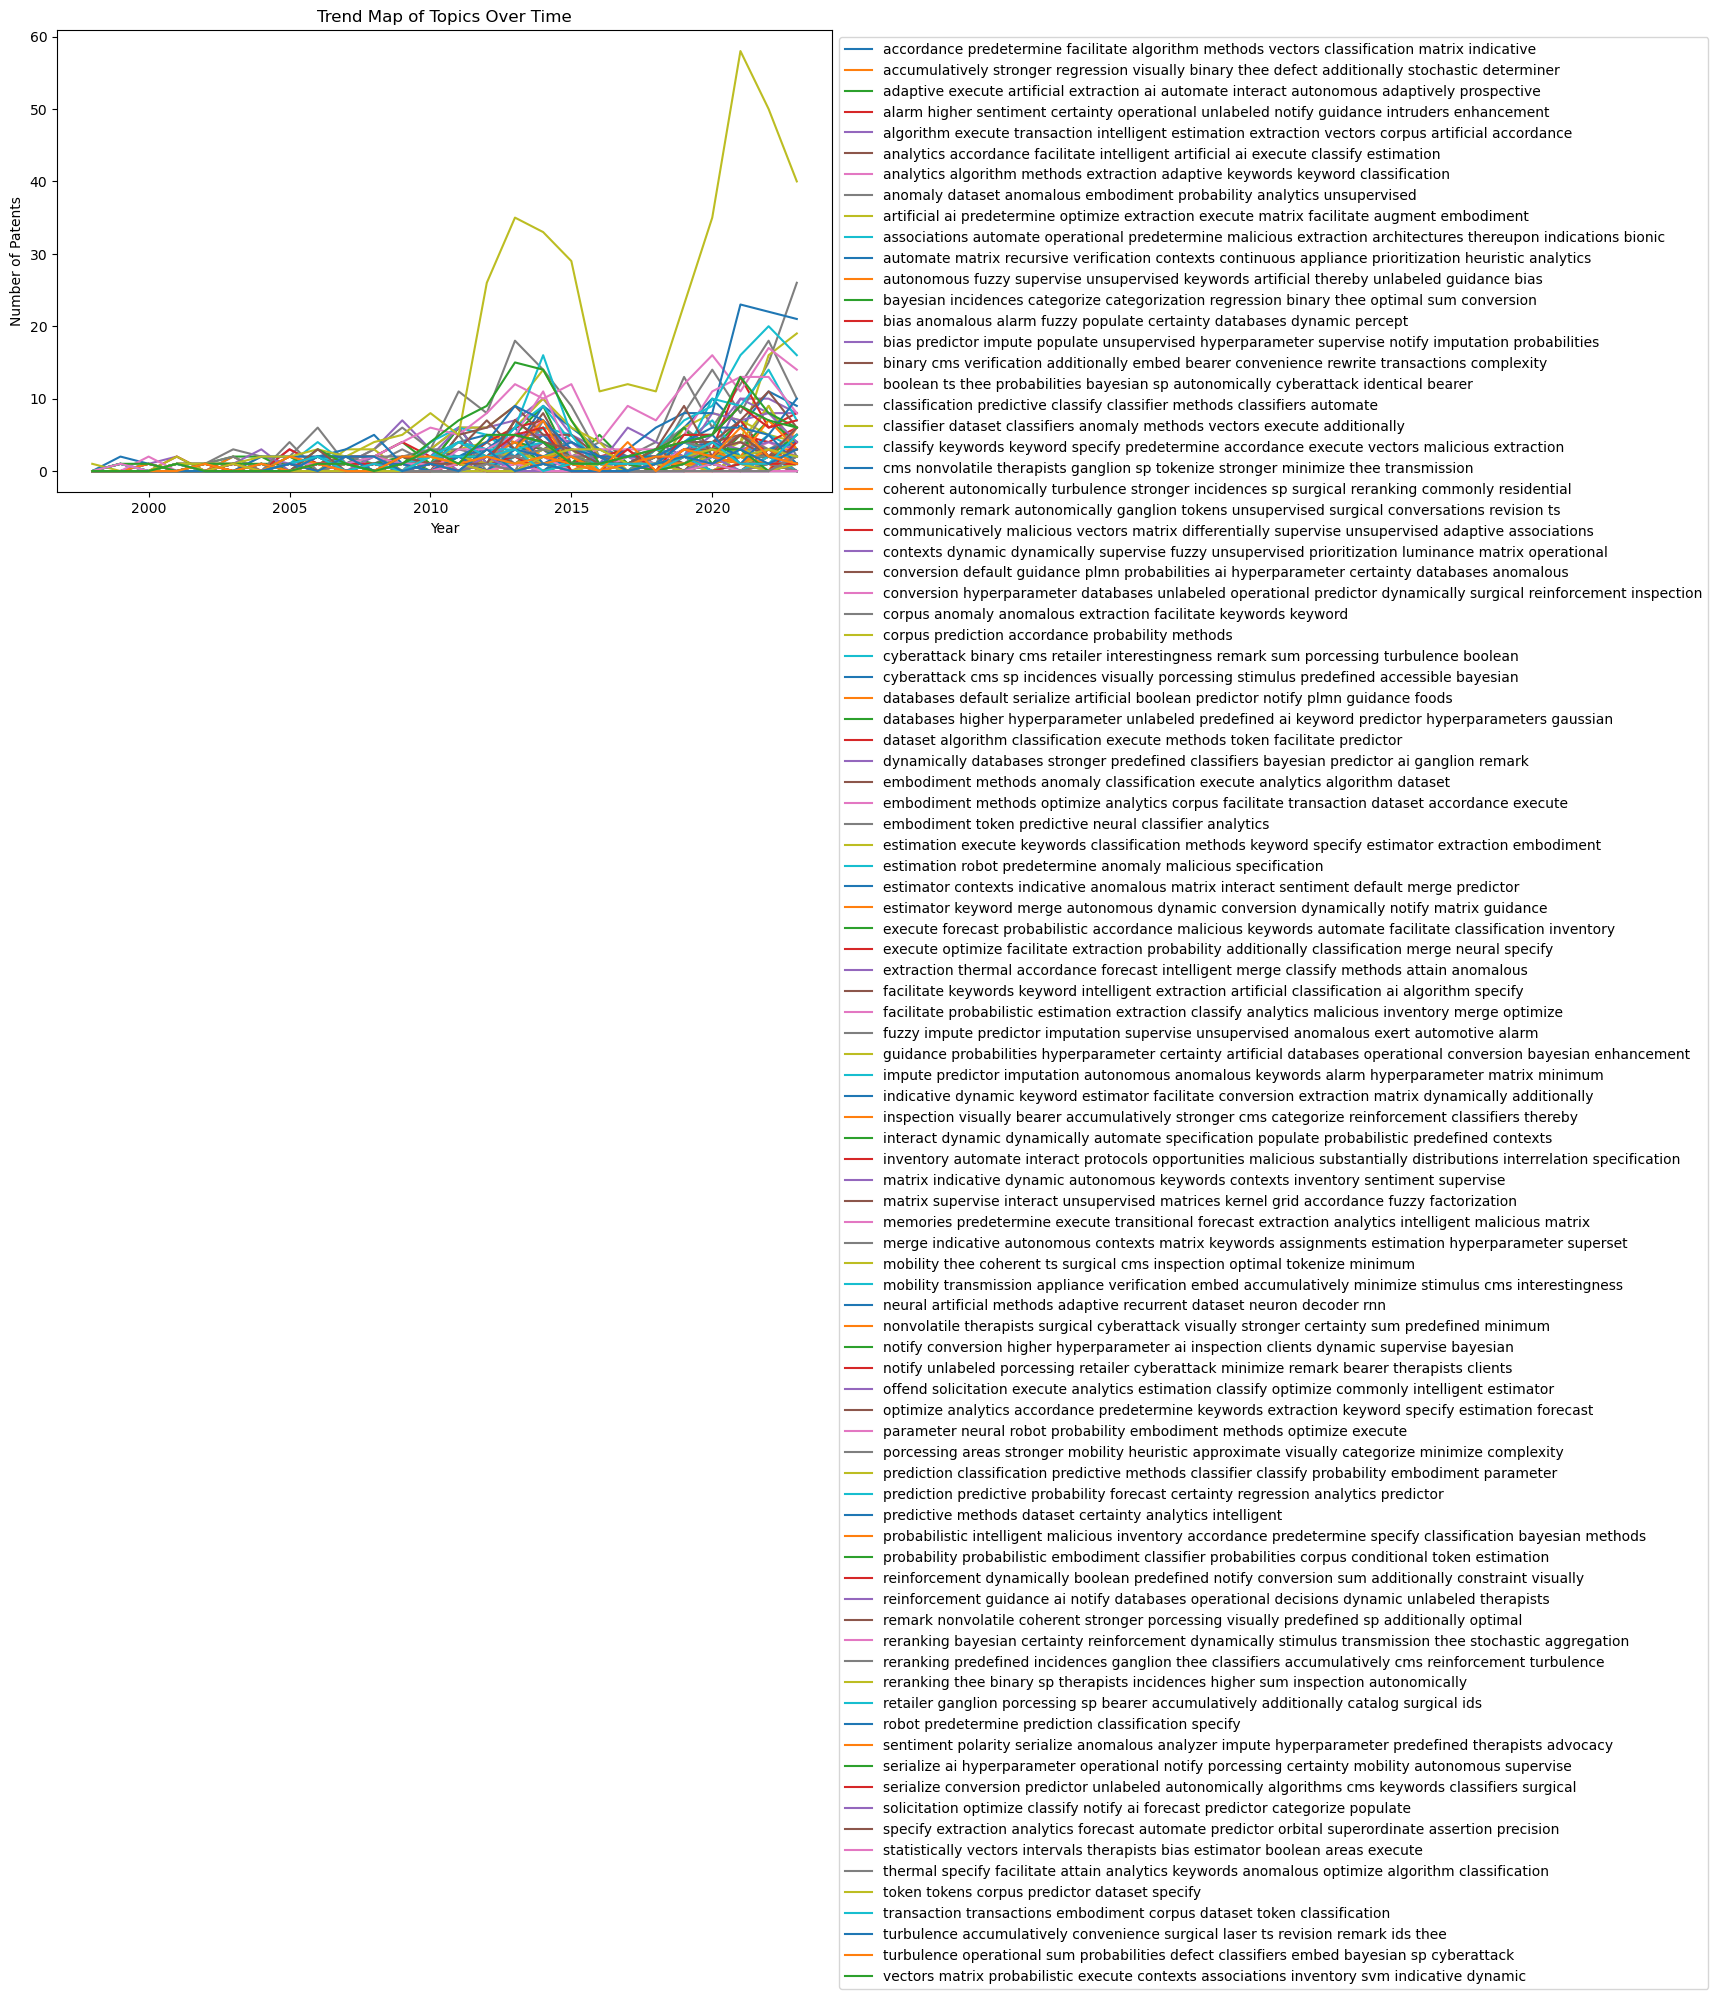

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Here'cluster_titles' is a dictionary with topic indices as keys and cluster titles as values

# Filling NaN values with a specific value (i.e., -1)
df['Topic'] = df['Topic'].fillna(-1)

# Converting the 'Topic' column to integer type
df['Topic'] = df['Topic'].apply(lambda x: int(x) if not np.isnan(x) else -1)

# Maping the topic numbers in the DataFrame to the corresponding cluster titles
df['Topic Title'] = df['Topic'].map(cluster_titles)

# Grouping by 'Year' and 'Topic Title' and counting the number of patents for each
topic_counts = df.groupby(['Year', 'Topic Title']).size()

# Reseting the index of the DataFrame and renaming the columns
topic_counts = topic_counts.reset_index(name='Number of Patents')

# Pivoting the DataFrame to get 'Year' as index, 'Topic Title' as columns and 'Number of Patents' as values
topic_counts_pivot = topic_counts.pivot(index='Year', columns='Topic Title', values='Number of Patents')

# Replacing NaN values with 0
topic_counts_pivot.fillna(0, inplace=True)

# Plotting the data
topic_counts_pivot.plot(kind='line', figsize=(10, 6))

# Moving the legend to upper left location
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Trend Map of Topics Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.show()


In [147]:
# Counting the number of patents for each topic title
topic_counts = df['Topic Title'].value_counts()

# Creating a new DataFrame from the topic counts
topic_count_df = pd.DataFrame({'Topic Title': topic_counts.index, 'Count': topic_counts.values})

# Calculating the percentage of total patents for each topic title
topic_count_df['Percentage'] = (topic_count_df['Count'] / topic_count_df['Count'].sum()) * 100

# Displaying the DataFrame
topic_count_df

,Topic Title,Count,Percentage
0,prediction classification predictive methods c...,558,10.492666
1,embodiment methods optimize analytics corpus f...,256,4.813840
2,classification predictive classify classifier ...,231,4.343738
3,prediction predictive probability forecast cer...,175,3.290711
4,probability probabilistic embodiment classifie...,160,3.008650
...,...,...,...
88,notify conversion higher hyperparameter ai ins...,2,0.037608
89,offend solicitation execute analytics estimati...,2,0.037608
90,conversion hyperparameter databases unlabeled ...,2,0.037608
91,reinforcement guidance ai notify databases ope...,2,0.037608


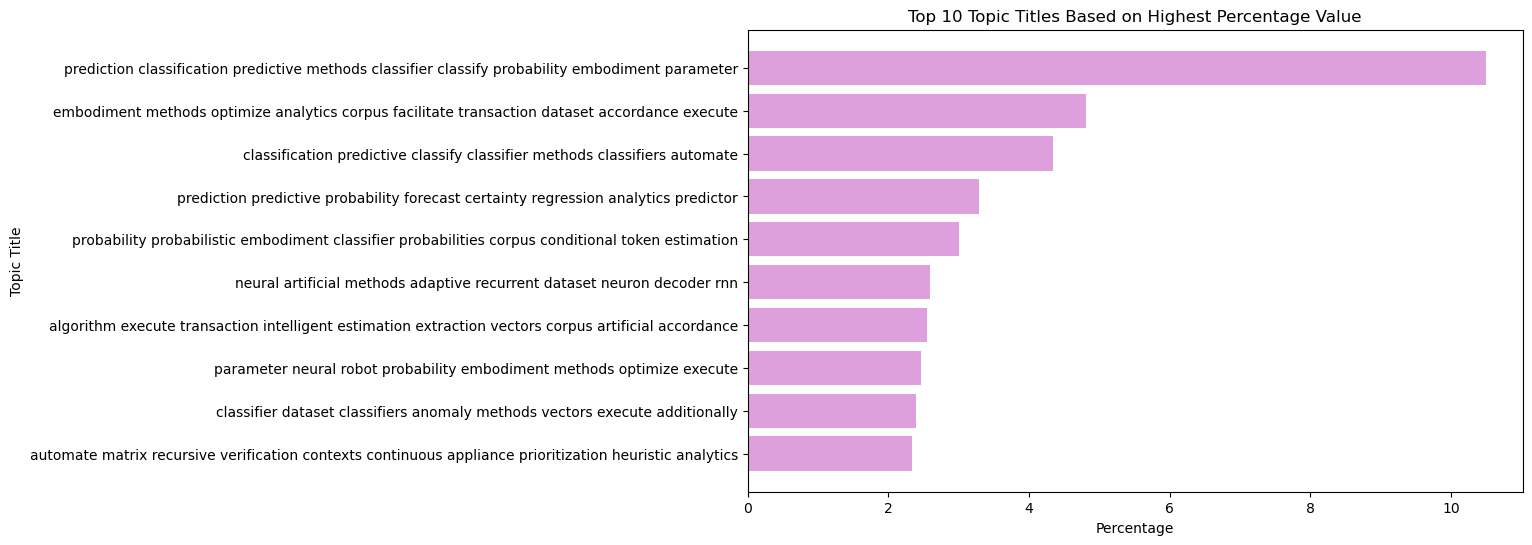

In [158]:
# Sorting the DataFrame by 'Percentage' in descending order
topic_count_df = topic_count_df.sort_values('Percentage', ascending=False)

# Getting the top 10 topics
top_10_topics = topic_count_df.head(10)

# Creating a bar plot of the 'Percentage' for each of the top 10 topics
plt.figure(figsize=(10, 6))
plt.barh(top_10_topics['Topic Title'], top_10_topics['Percentage'], color='plum')
plt.xlabel('Percentage')
plt.ylabel('Topic Title')
plt.title('Top 10 Topic Titles Based on Highest Percentage Value')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the highest value at the top
plt.show()


In [168]:
df.tail(30)

,Patent Title,Patent Number,Date of Patent,Abstract,Inventor,Assignee,Tokenized Patent Title,Tokenized Abstract,Merged Tokenized Abstract,3-Month Segment,Title Length,Abstract Length,Merged Tokenized Abstract Corpus,Preprocessed Text,Preprocessed Text_2,Preprocessed Text_3,TF-IDF Vectors,Topic,Year,Topic Title
5392,"system, method, and program storage medium for...",6263325,2001-07-17,a system for executing a learning algorithm ...,"yukiko yoshida, nobue adachi",fujitsu limited,"[system, method, program, storage, medium, exe...","[system, execute, learn, algorithm, solve, opt...","[system, method, program, storage, medium, exe...",2001Q3,77,79,system method program storage medium execute l...,execute algorithm execute algorithm optimizati...,execute algorithm execute algorithm optimizati...,execute algorithm execute algorithm evolutiona...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",20,2001.0,algorithm execute transaction intelligent esti...
5393,method of and apparatus for providing self-lea...,6236905,2001-05-22,a method of and apparatus for providing self...,sean j. whitmarsh,ricon corporation,"[method, apparatus, provide, correction, platf...","[method, apparatus, provide, correction, error...","[method, apparatus, provide, correction, platf...",2001Q2,95,77,method apparatus provide correction platform p...,apparatus correction apparatus correction vehi...,apparatus correction apparatus correction vehi...,vehicular wheelchair machinery compensate over...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",21,2001.0,classify keywords keyword specify predetermine...
5394,multilevel taxonomy based on features derived ...,6233575,2001-05-15,"a system, process, and article of manufactur...","rakesh agrawal, soumen chakrabarti, byron edwa...",international business machines corporation,"[multilevel, taxonomy, base, feature, derive, ...","[system, process, article, manufacture, organi...","[multilevel, taxonomy, base, feature, derive, ...",2001Q2,129,95,multilevel taxonomy base feature derive train ...,multilevel taxonomy classification fisher manu...,multilevel taxonomy classification fisher manu...,multilevel taxonomy classification fisher dele...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",27,2001.0,estimation execute keywords classification met...
5395,intelligent user assistance facility for a sof...,6233570,2001-05-15,a general event composing and monitoring sys...,"eric horvitz, john s. breese, david e. heckerm...",microsoft corporation,"[intelligent, user, assistance, facility, soft...","[general, event, compose, monitor, system, all...","[intelligent, user, assistance, facility, soft...",2001Q2,59,78,intelligent user assistance facility software ...,intelligent events combinations events specifi...,intelligent events combinations events specifi...,intelligent specification interact,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",48,2001.0,interact dynamic dynamically automate specific...
5396,parallel classification for data mining in a s...,6230151,2001-05-08,a method and system for generating a decisio...,"rakesh agrawal, ching-tien ho, mohammed j. zaki",international business machines corporation,"[parallel, classification, data, mine, multipr...","[method, system, generate, classifier, paralle...","[parallel, classification, data, mine, multipr...",2001Q2,80,76,parallel classification data mine multiprocess...,parallel classification multiprocessor classif...,parallel classification multiprocessor classif...,classification multiprocessor classifier multi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2001.0,classification predictive classify classifier ...
5397,coarse indexes for a data warehouse,6216125,2001-04-10,"a coarse database index, and system and meth...",theodore johnson,at&t corp.,"[coarse, index, data, warehouse]","[coarse, database, index, system, method, use,...","[coarse, index, data, warehouse, coarse, datab...",2001Q2,35,112,coarse index data warehouse coarse database in

Top 10 topics are: 
                                           Topic Title  Unique Assignee Count
68  prediction classification predictive methods c...                    211
36  embodiment methods optimize analytics corpus f...                    103
69  prediction predictive probability forecast cer...                     85
17  classification predictive classify classifier ...                     84
60  neural artificial methods adaptive recurrent d...                     80
72  probability probabilistic embodiment classifie...                     69
66  parameter neural robot probability embodiment ...                     68
7   anomaly dataset anomalous embodiment probabili...                     68
4   algorithm execute transaction intelligent esti...                     63
18  classifier dataset classifiers anomaly methods...                     58


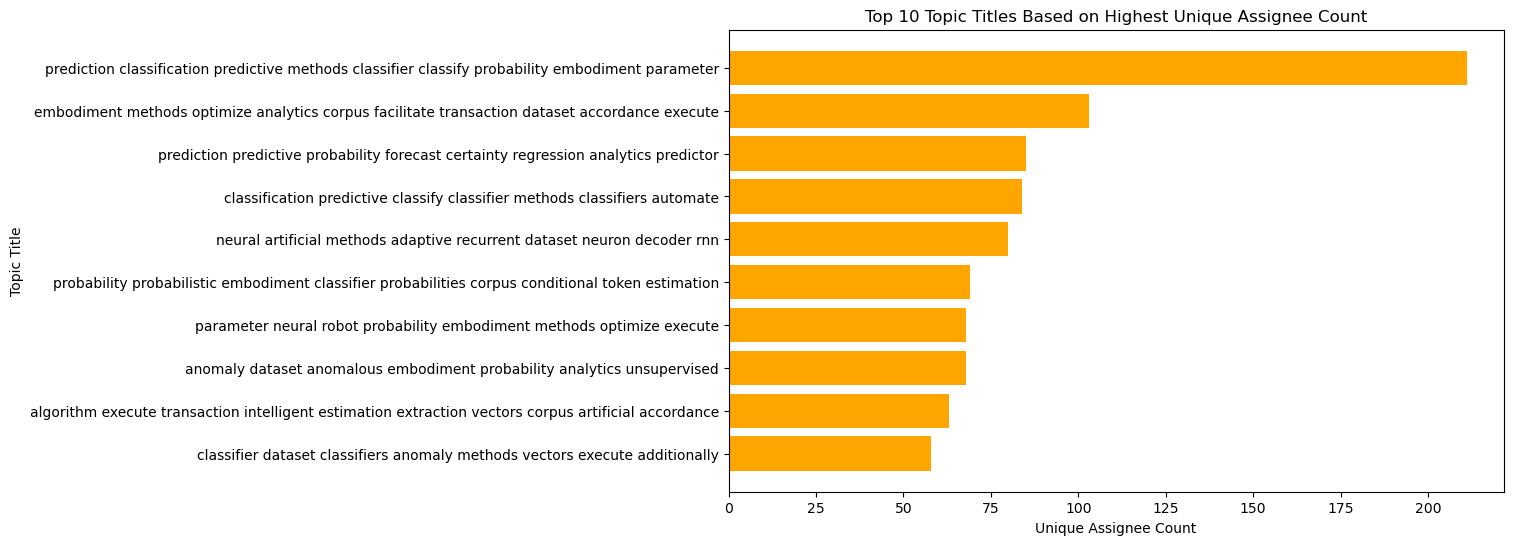

In [167]:
# Grouping by 'Topic Title' and 'Assignee', and counting the unique 'Assignee' for each 'Topic Title'
assignee_counts = df.groupby('Topic Title')['Assignee'].nunique()

# Creating a new DataFrame from the assignee counts
assignee_count_df = pd.DataFrame({'Topic Title': assignee_counts.index, 'Unique Assignee Count': assignee_counts.values})

# Sorting the DataFrame by 'Unique Assignee Count' in descending order
assignee_count_df = assignee_count_df.sort_values('Unique Assignee Count', ascending=False)

# Getting the top 10 topics
top_10_topics = assignee_count_df.head(10)
print("Top 10 topics are: \n", top_10_topics)

# Creating a bar plot of the 'Unique Assignee Count' for each of the top 10 topics
plt.figure(figsize=(10, 6))
plt.barh(top_10_topics['Topic Title'], top_10_topics['Unique Assignee Count'], color='orange')
plt.xlabel('Unique Assignee Count')
plt.ylabel('Topic Title')
plt.title('Top 10 Topic Titles Based on Highest Unique Assignee Count')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the highest value at the top
plt.show()
